# DSML Revision Toolbox

# Outline [^](#outline)

1. [Week 1: Data Generation](#Week1)
2. [Week 2: Distributions and Data Generation](#Week2)
3. [Week 3: Statistics](#Week3)
4. [Week 4: Parameter Estimation](#Week4)
5. [Machine Learning: Data Preprocessing and Evaluation Metrics](#MLGeneral)
6. [Week 5: KNN Classification](#Week5)
7. [Week 6: SVM Classification and Regression](#Week6)
8. [Week 7: Performance Metrics (Extended)](#Week7)
9. [Week 8: Decision Trees](#Week8)
10. [Week 9: Neural Networks](#Week9)
11. [Week 10: Convolutional Neural Networks](#Week10)
12. [Useful Functions: MUST BE IMPORTED FOR EVERYTHING ELSE](#Useful)

   

## Packages to import 

In [169]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import to_rgba
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import kstest
from scipy.stats import ks_2samp
import iminuit
from iminuit.cost import LeastSquares
from iminuit import Minuit 
from iminuit.cost import BinnedNLL
from iminuit.cost import UnbinnedNLL
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_moons
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import torch 
import torch.nn as nn
from torch.utils.data import TensorDataset, random_split, DataLoader
from sklearn.datasets import make_classification
from torchvision import transforms
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import torchvision
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Week 1: Data Visualisation
<a id='Week1'></a>

See cheatsheats for plotting help or fill in here when i have time e.g. ticker

### Perfect Generic Graph

```python
fig = plt.figure(figsize = (6,4), dpi = 500)
ax = fig.add_subplot(111)
ax.grid() 
ax.errorbar(X, data, xerr = xerror, yerr = yerror, fmt = '.',label='Data',color='#D55E00',capsize = 3)
ax.set_xlabel('X Range',fontsize = 16)
ax.set_ylabel('Std Gauss',fontsize= 16)
ax.set_title('Generated Gauss',fontsize= 20)
''' Framealpha prevents grid lines from showing through legend'''
ax.tick_params(axis='both',labelsize = 12, direction='in',top = True, right = True, which='both')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc='upper left',fontsize = 12, framealpha = 1) 
'''CHANGE FONTSIZE OF NUMBERS ON AXIS'''
'''OR US ax.set_xticks and ax.set_yticks FOR INDIVIDUAL'''

minor_locatory = AutoMinorLocator()
minor_locatorx = AutoMinorLocator()

# Set minor locator for both x-axis and y-axis
ax.xaxis.set_minor_locator(minor_locatorx)
ax.yaxis.set_minor_locator(minor_locatory)

```

`from matplotlib import ticker`<br>

`ax.tick_params(direction='in',top=True,right=True,which='both',labelsize =12)`: Set general parameters <br>
`plt.xticks(np.linspace(0, 2000, 11))`: Set number of ticks in a range<br>
<br>
`from matplotlib.ticker import MultipleLocator`: makes placing ticks easier; can put major/minor ticks at fixed multiples<br>
e.g.
- `ax.xaxis.set_minor_locator(MultipleLocator(0.5))`:tells it to place the small ticks every 0.5 on the horizontal axis



## Week 2: Distributions and Monte Carlo Data Generation
<a id='Week2'></a>

#### Some Notation
`X`: Input </br>
`y`: Output </br>
`f(X)`: Probability Distribution </br>
`F(X)`: CDF 


### Probability Distributions

`Binomial:`<br>
`Poisson:`<br>
`Normal:`<br>
`Chi Square:`<br>

### Analytic and Empirical Method
#### Want to generate **random** data following a distribution f(x):
1. Calculate analytic or empirical CDF **(normalise)**
$F(X) = Z \int_{-\infty}^X f(X') \, dX'$ where Z is the normalisation factor, solve for by letting expression = 1 </br>
or empirically: 
```python
ycdf = np.sumsum(y)
ycdf = ycdf/ycdf[-1] # Use the last value to normalise values
```
2. Calculate inverse CDF (if empirical, interpolate X vs CDF - `CubicSpline(CDF,X)`
3. Generate uniform samples `samples = rng.uniform(0,1,size = number_samples)`
4. Apply inverse CDF to samples
5. Histogram generated samples (can show predicted frequencies using number_samples x CDF between bin edges - shown in example below)

### Accept - Reject Method

1. Generate a random number X from a uniform distribution over the range of the desired PDF
2. Generate a second random number y from the uniform distribution h(y) = U(0,a) where a is the maximum value of the function within the range of values required.
3. If y $\leq $ f(X) then accept this point; otherwise it is rejected
4. Repeat from (1) until you have the number of points you want.
The set of kept values are a set random values drawn from a probability distribution with pdf f(X)

This method only accepts points that lie beneath the desired PDF; because regions of the PDF with higher probability have more "vertical" space available, the density of points accepted in these regions is increased compared to regions of low probability.

#### Code Example

Consider a function $f(X) = -X^{2} + 4$ for the range $-2 \leq X \leq 2$
```python
# Define the function. Note this is NOT normalised.
# Note for a more complicated function with discontinuities we just need more code with "if" statements
def f(x):
    return -x**2 + 4

# We want to generate values within the range X=-2..2. 
# We need $a$ the maximum value of $f(X)$ in that range which we set by hand
a_value = f(0.0)

# For reproducibility, I like to fix the seed for the random number generator, any number is as good as any other
rng = np.random.default_rng(0) 

# Generate uniform X samples in the region of interest
x_samples = rng.uniform(-2,2,size = 5000)

# Generate uniform y samples in U(0, max(f(X)) (where the max(f(X) here is at f(0))
y_samples = rng.uniform(0,a_value,size = 5000)

# Find which samples fulfill the criteria y <= f(X);
# This is an array of True and False values 
accept = (y_samples <= f(x_samples))

# Plot the PDF, envelope function, and some samples
fig, ax = plt.subplots(1,1,figsize = (9,7))
# Next draw box containing all the points which are drawn
ax.plot([-2,-2,2,2],[0,a_value,a_value,0],ls='--',color='grey',label='Envelope function $h(y)$')
# Next draw function
ax.plot(np.linspace(-2,2,100),f(np.linspace(-2,2,100)),label='$f(X)$',color='black')
ax.set_xlim(-2.2,2.2)
ax.set_ylim(0,1.35*a_value) # leave a little space at the top for the legend
ax.set_xlabel('$X$',fontsize = 18)
ax.set_ylabel('$y$',fontsize = 18)
ax.tick_params(labelsize = 14,which='both')
# Next plot ALL the points tried as failed points 
ax.scatter(x_samples, y_samples, s = 1, label='Rejected samples', color='#56B4E9')
# but then for the points we accept we plot another point to indicate accepted points as this will be on top and seen by us
ax.scatter(x_samples[accept],y_samples[accept],s = 1,c='#D55E00',label = 'Accepted samples')
ax.legend(loc='upper center',fontsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
```

### Example of Analytic Monte Carlo Data Generation - w/ Histogram and Plotted Expected Frequencies

Text(0, 0.5, 'Frequency')

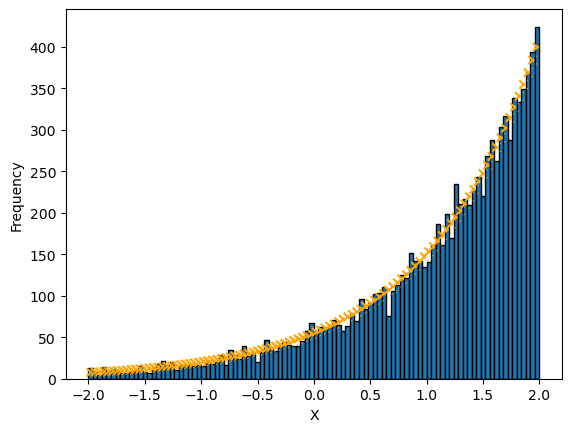

In [2]:
n_obs = 10000
X = np.linspace(-2,2,n_obs)
bins = np.linspace(-2, +2, 101) 

def f(X):
    return np.exp(X)

def F(X):
    return np.exp(X)-np.exp(-2)

Z=(np.exp(2.0)-np.exp(-2.0)) # Normalisation factor
def cdf(X): # normalised form
    return (np.exp(X)-np.exp(-2.0))/Z

def Inv(u): #normalised inverse cdf
    return np.log(u*Z+np.exp(-2)) 

u = np.random.uniform(0,1, n_obs)
samples = Inv(u)

counts, bins, patches = plt.hist(samples, bins = bins, edgecolor = 'black')

bin_centres=[(bins[b]+bins[b-1])/2 for b in range(1,len(bins))]
expected_freqs = [n_obs * (cdf(bins[i]) - cdf(bins[i-1])) for i in range(1,len(bins))] #n_obs * CDF between bin edges = expected freq

plt.scatter(bin_centres, expected_freqs, marker ='x', c = 'orange', linestyle = '--')
plt.xlabel('X')
plt.ylabel('Frequency')
           

## Week 3: Statistics - Chi Squared, KS Tests and P-values
<a id='Week3'></a>

**p-value**: Probability of getting a certain value for a test statistic. Built into KS test functions. </br>
**D-value**: Measures difference between either an empirical cdf and a theoretical cdf, or between two empirical cdfs. Larger D = greater disagreement.

### KS Tests
May want to plot CDFs of the samples being compared against each other

##### 1 Sample KS Test:
Compares sample to reference distribution <br>
`D, p = ks_1samp(sample (not cdf), theoretical_cdf, (theoretical_cdf arguments))` <br>
e.g. `D, p = ks_1samp(sample_1, norm.cdf,(3.0,0.5))` <br>
All distributions contained in scipy.stats 
##### 2 Sample KS Test:
Tests if two samples may belong to the same, **unknown** distribution. <br>
`D, p =  ks_2samp(target_sample, sample_1)` <br>

<div class="alert alert-block alert-info">
Note that for both tests we don't pass the empirical data for the cdf, the function finds the cdf itself.


#### Chi Squared Statistic/ Goodness of Fit Test

**reduced chi-square statistic** $\chi_\nu^2$
$$
\chi^2_\nu = \frac{\chi^2}{N_\text{dof}}
$$
$$
N_{dof} = N_{data} - N_{params}
$$
 
* If $\chi_\nu^2$ is around 1.0 then we may have a good fit.
<br>
<br>    
* For values of $\chi_\nu^2$ much greater than 1, average deviation is much greater than $1\sigma$ i.e cannot be explained by random fluctuations:
    1. The chosen model could have too few parameters to model the data well; you could be **underfitting**.
    1. The choice of parameters $\boldsymbol{\theta}$ may not be correct even if the type of model is correct.
    1. The uncertainty on measurements $\sigma_i$ could be underestimated. 
<br>
<br>
* For values of $\chi_\nu^2$ much less than 1, the average deviation is much less than $1\sigma$:
    1. The chosen model could have too many parameters for the data; you could be **overfitting**.
    2. The uncertainty on each data point could be overestimated. </br>
</br>
<div class="alert alert-block alert-info"> 
Define our own chi squared function since built in uses Pearson version (where uncertainties are sqrt of values)
```python
def chisquare(yvalues,fvalues,svalues):
    chisqvalues = [ (yvalues[i]-fvalues[i])*(yvalues[i]-fvalues[i])/(svalues[i]*svalues[i]) for i in range(len(yvalues)) ]
    return sum(chisqvalues), chisqvalues
```

### Plotting Distributions and Statistic Values


Text(0, 0.5, 'f($\\chi^2$; 20)')

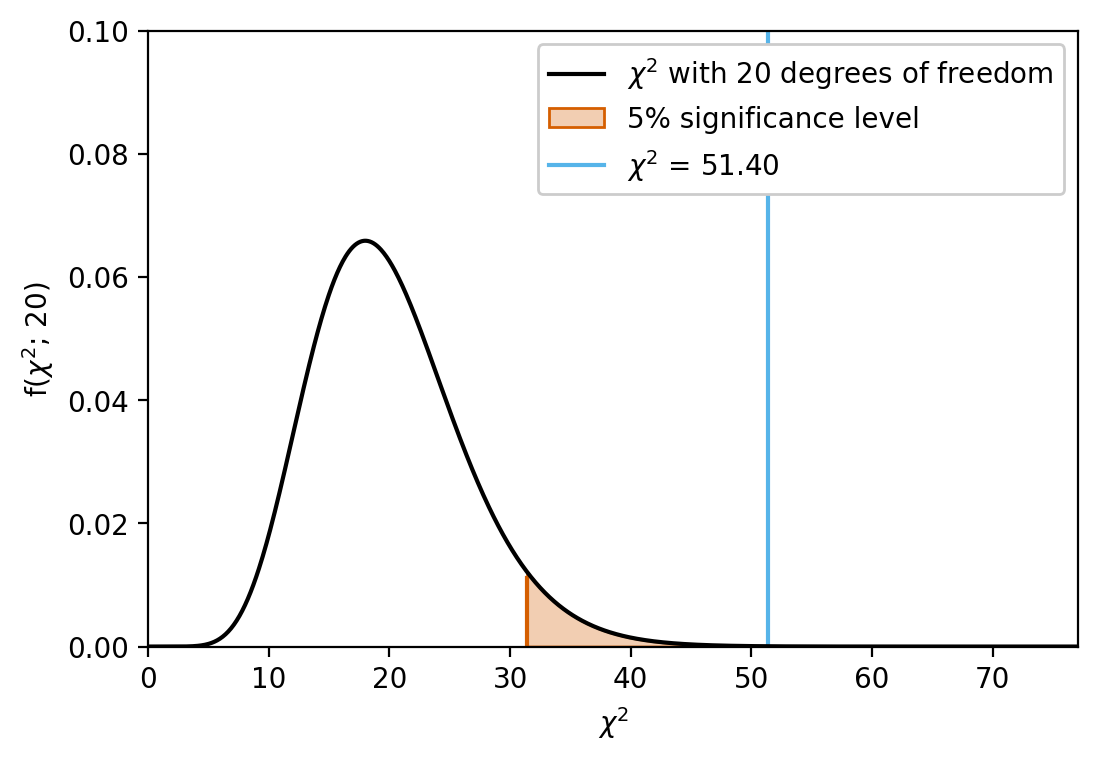

In [3]:
ndof = 20
chisqvalue = 51.4
x_max = chisqvalue*1.5

X = np.linspace(0,x_max,1000)
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.plot(X, chi2.pdf(X, ndof), label='$\chi^2$ with {:d} degrees of freedom'.format(ndof),
                              color='black',zorder = 1)
ax.plot([chi2.ppf(0.95,ndof),chi2.ppf(0.95,ndof)],[0,chi2.pdf(chi2.ppf(0.95,ndof),ndof)-0.001],zorder = 0,color='#D55E00')
ax.fill_between( np.linspace(chi2.ppf(0.95,ndof), x_max, 1000), 
                 np.repeat(0,1000), 
                 chi2.pdf( np.linspace(chi2.ppf(0.95,ndof),x_max,1000),ndof),
                 fc=to_rgba('#D55E00',0.3),
                label='5% significance level', edgecolor='#D55E00', zorder = 0)
ax.plot([chisqvalue, chisqvalue], [0,0.1], 
        color='#56B4E9', zorder = 0, 
        label=r'$\chi^2$ = {:4.2f}'.format(chisqvalue))

ax.set_ylim(bottom = 0, top = 0.1)
ax.set_xlim(0,x_max)
ax.legend(loc='upper right',framealpha = 1)
ax.set_xlabel('$\chi^2$')
ax.set_ylabel('f($\chi^2$; {:d})'.format(ndof))

## Week 4: Parameter Estimation
<a id='Week4'></a>

### Using Iminuit

Iminuit fits can be performed by minimising the chi squared statistic or maximimising likelihood (usually multiply by -1 to convert to minimisation problem).

```python
from iminuit import Minuit 
from iminuit.cost import LeastSquares
```

### ChiSquared Fits
Minimises the chisquared statistic
\begin{equation*}
\chi^2(\boldsymbol{\theta}; y_i) = \sum_i p_i^2 = \sum_i \frac{(y_i - f(X_i; \boldsymbol{\theta}))^2}{(\sigma_i)^2},
\end{equation*}

i.e. (data-expected)/unc all squared to get closest expected values as possible.

##### Example usage of Iminuit - chisquared fit
```python
cost_obj = LeastSquares(x_data,y_data,y_err,fit_func)
mobj = Minuit(cost_obj, [list of params, or can set manually with e.g. m = 5])
mobj.migrad() #perform fit 
mobj.hesse() #calculate uncertainties
display(mobj.params)
```

### Likelihood Fits
Likelihood gives the probability of exact data for a given value of some parameter $\theta$.

Unbinned fits apply directly to the raw data sample. The easiest to use, but can become slow when the sample size is large.
Binned fits are applied to binned data, which means you must appropriately bin your sample. **The binning has to be fine enough to retain all the essential information.** These are in general much faster than unbinned fits.

To perform an unbinned fit, you must provide the (vectorized) PDF of the model i.e. a numpy function or a scipy function. The PDF must also be normalised.<br>
`c = UnbinnedNLL(x_data, model_pdf)`

**For a binned fit, instead of supplying a PDF we must provide a CDF in this case.** <br>
`cost = BinnedNLL(n, xe, model_cdf)`




### Example Procedure to Choose Level of Binning

<div class="alert alert-block alert-info"> 
    We want each bin to have at least 5 counts or Poisson statistics breaks down. Vertical line showslowest X value where the bin had less than a count of 5.
</br>
</div>   
<img src='Bin Choice.png' align = 'center' width=1000>

### Advanced Parameter Methods

#### Fixing and Releasing parameters example:

We fix and release parameters when we want to optimise the other parameters in isolation
```python
mobj.fixed['m'] = True
mobj.migrad()
mobj.fixed = False # Can release all parameters at once this way
mobj.migrad()
```
#### Masking:

Often use masks along with parameter fixing. This allows us to e.g. fit background parameters to data either side of a peak, and then fit the peak independently.

e.g. `cmask.mask = (data_x < 120) | (data_x > 130)` - Release by setting to `None`


#### Parameter Limits:

Can also force the parameters to be optimised within a certain range
`minmask.limits['A'] = (250,500)`

#### Example Procedure - taken from fitting a peak amongst background data

1. Fix the signal parameters $\mu$, and $\sigma$
2. Set physical limits on background parameters C, and D
3. Mask the relevant region
4. Fit the model
5. Fix background parameters and release signal parameters
6. Set physical limits on signal parameters
7. Remove the mask
8. Fit the model
9. Finally, release all parameters and fit one final time

### Evaluating Fit Success

`mobj.fmin`: prints state of the fit and the metrics.<br>
`print(minmask.valid)`: shows whether the fit was valid - **most important**. If failed, may be no local minimum.<br>
`is_above_max_edm`: Estimated distance to minimum too large - doesn't converge <br>
`has_reached_call_limit`: not converging, can maybe raise limit<br>



### Comprehensive Iminuit Example

In [85]:
import pickle as pk

with open('signal','rb') as infile:
    signal_data = pk.load(infile)   

# Start with some basic measurements of the data
print(signal_data.shape)
print(" Number of data points is "+str(len(signal_data)))
print(" X (energy/GeV): min={:.2f}, max={:.2f}".format(min(signal_data),max(signal_data)))

(30550,)
 Number of data points is 30550
 X (energy/GeV): min=90.00, max=226.12


50 bins giving average number of data points per bin is 611.0
We have 14 bins with counts less then 5 starting from 183.9
100 bins giving average number of data points per bin is 305.5
We have 36 bins with counts less then 5 starting from 173.7
200 bins giving average number of data points per bin is 152.8
We have 81 bins with counts less then 5 starting from 168.6
400 bins giving average number of data points per bin is 76.4
We have 185 bins with counts less then 5 starting from 153.8


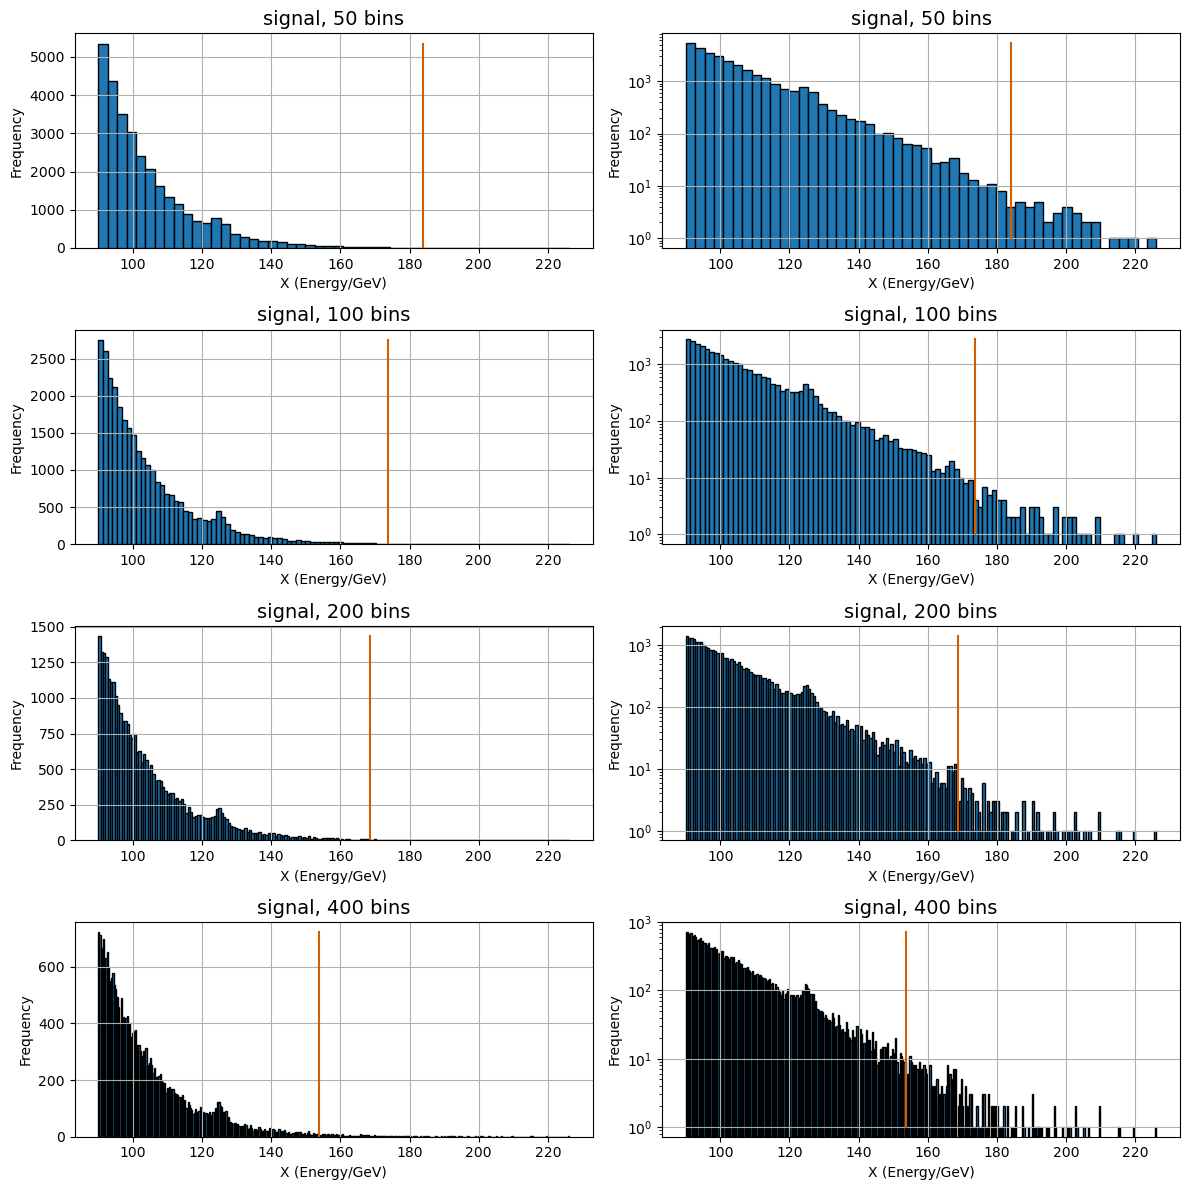

In [86]:
min_bin_count = 5

n_bin_list=[50,100,200,400] # these are the n_bin values we might consider, change or add to them 
n_bin_values = len(n_bin_list)
fig, axs = plt.subplots(n_bin_values,2,figsize = (12,12)) 
    
for rrr in range(n_bin_values): # row for each distinct number of bins value
    n_bins = n_bin_list[rrr]
    print(str(n_bins)+" bins giving average number of data points per bin is {:.1f}".format(len(signal_data)/n_bins))    
    
    for ccc in [0,1]: # two columns: one for normal axes plot and one for plot with log y axis.
        if ccc==1:
            axs[rrr,ccc].set_yscale('log')
        axs[rrr,ccc].set_title("signal, {:d} bins".format(n_bins),fontsize= 14)
        data_y, bins, ppp = axs[rrr,ccc].hist(signal_data , edgecolor='black', bins=n_bins)
        data_x = 0.5*(bins[1:]+bins[:-1]) # x value is centre of each bin
        x_small_bincount = data_x[data_y<min_bin_count]
        x_small_bincount_min = min(x_small_bincount)
        axs[rrr,ccc].plot( [x_small_bincount_min,x_small_bincount_min],
                           [1,data_y[0]], '-', color='#D55E00',)
        axs[rrr,ccc].grid()
        axs[rrr,ccc].set_xlabel('X (Energy/GeV)')
        axs[rrr,ccc].set_ylabel('Frequency')

    print("We have {:d} bins with counts less then {:d} starting from {:5.1f}".format(len(x_small_bincount),min_bin_count,x_small_bincount_min))

# Labels and titles of subplots often overlap so try this to solve that 
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.savefig('Bin Choice')

In [90]:
# Set the number of bins to be used by the rest of this exercise
n_bins=200
print("\n*** FINAL choice for number of bins is "+str(n_bins))
min_bin_count = 5
print("*** Limit X to be below lowest X value of any bin containing counts less than  "+str(min_bin_count))

# Prepare data for rest of exercise
data_y_all, bin_edges_all = np.histogram(signal_data, bins = n_bins)
data_x_all = 0.5*(bin_edges_all[1:]+bin_edges_all[:-1]) # x value is centre of each bin

# Cutoff bins at high X with low numbers of counts
x_small_bincount = data_x_all[data_y_all<min_bin_count]
x_small_bincount_min = min(x_small_bincount) 
print("    We will drop {:d} bins starting from X={:5.1f} from our analysis".format(len(x_small_bincount),x_small_bincount_min))


# Now limit to data to final range of  X < x_small_bincount_min so data_y[i] >= min_bin_count = 5 
data_x = data_x_all[ data_x_all < x_small_bincount_min ] 
data_y = data_y_all[ data_x_all < x_small_bincount_min ] 
data_yerr = np.sqrt(data_y)


*** FINAL choice for number of bins is 200
*** Limit X to be below lowest X value of any bin containing counts less than  5
    We will drop 81 bins starting from X=168.6 from our analysis


In [96]:
# Exponential and gaussian
def exp_plus_gauss(x, A, B, C, D, mu, sigma):
    return A*np.exp(-(x-B)/C) + D*np.exp(-(x - mu)**2/(2*sigma**2))

cost = LeastSquares(data_x, data_y, data_yerr, exp_plus_gauss)

#Estimate parameters
# The errors are small around values at indices i0=0 and i1 so try those
i0 = 0 # lots of data at the start
i1 = int(0.5+len(data_x)/6) # noisy data at end so second point in middle of data set but avoid feature around X=125
print (f"Using X0={data_x[i0]:.1f} and X1={data_x[i1]:.1f} to estimate parameters")
B_est = 0
C_est = - (data_x[i1]-data_x[i0]) / np.log( data_y[i1] / data_y[i0] ) 
A_est = data_y[i0] * np.exp( (data_x[i0] - B_est) / C_est) 

print(f"For exponential distribution f(X) = a exp(-(x-b)/c), estimate a={A_est:g}, b={B_est:f}, c={C_est:f}")
est_form_str = f"f(X) = {A_est:.2g} exp( -(X-{B_est:4.2f}) / {C_est:4.1f})"
print ("    so fitting "+est_form_str)

# We set by eye the gaussian parameters
mu_est = 125
sigma_est = 5
D_est = 100

print(f"For exponential plus gaussian distribution f(X) = A exp(-(x-B)/C) + D exp( -(x-mu)^2/sigma^2 )")
print(f"   estimate A={A_est:g}, B={B_est:f}, C={C_est:f}, D={D_est:g}, mu={mu_est:f}, sigma={sigma_est:f}")


Using X0=90.3 and X1=103.3 to estimate parameters
For exponential distribution f(X) = a exp(-(x-b)/c), estimate a=588710, b=0.000000, c=15.013027
    so fitting f(X) = 5.9e+05 exp( -(X-0.00) / 15.0)
For exponential plus gaussian distribution f(X) = A exp(-(x-B)/C) + D exp( -(x-mu)^2/sigma^2 )
   estimate A=588710, B=0.000000, C=15.013027, D=100, mu=125.000000, sigma=5.000000


In [99]:
mobj = Minuit(cost, A=A_est, B=B_est, C=C_est, D=D_est, mu=mu_est, sigma=sigma_est) 

mobj.fixed['D'] = True
mobj.fixed['mu'] = True
mobj.fixed['sigma'] = True

# Mask the signal region as specified in question 
xsignal_min=120
xsignal_max=130

# You could try the region I used for plotting above based on the fitted parameter estimates
# xmask_min, xmask_max = mu_value-5*sigma_value, mu_value+5*sigma_value

# The mask is just an array of boolean values, true at each X value (in data_x) to be included 
x_mask_no_signal = (data_x < xsignal_min) | (data_x >xsignal_max)
cost.mask= x_mask_no_signal

mobj.migrad()

# Release the signal parameters, 
mobj.fixed['D'] = False
mobj.fixed['mu'] = False
mobj.fixed['sigma'] = False

# Fix background parameters
mobj.fixed['A'] = True
mobj.fixed['B'] = True
mobj.fixed['C'] = True

# set limits on signal parameters
mobj.limits['D'] = (0,None) # set limit on D to be minimum of 0, no maximum
mobj.limits['mu'] = (xsignal_min,xsignal_max) # set mu to lie in signal region
mobj.limits['sigma'] = (0,None) # set limit on sigma to be minimum of 0, no maximum

# remove the mask of the signal region
#signal_lsq_eg_obj2.mask = None 

# Just fit to signal region
x_mask_only_signal = (data_x >= xsignal_min) & (data_x <= xsignal_max)
cost.mask= x_mask_only_signal

mobj.migrad()

# Release all parameters, refit the whole model & calculate error using hesse

# Fix background parameters
mobj.fixed['A'] = False
mobj.fixed['B'] = False
mobj.fixed['C'] = False

# remove the mask, fit all data 
cost.mask = None 

# Fit the model
mobj.migrad()

print("Valid fit? "+str(mobj.valid))

hhh = mobj.hesse() # calculate parameter uncertainties

for param in mobj.params:
    print('{} = {:.2f} +/- {:.2f}'.format(param.name, param.value, param.error))


Valid fit? True
A = 709224.48 +/- 54389.80
B = 3.76 +/- 1.07
C = 13.94 +/- 0.08
D = 99.08 +/- 9.35
mu = 125.19 +/- 0.14
sigma = 1.44 +/- 0.15


NameError: name 'mu_value3' is not defined

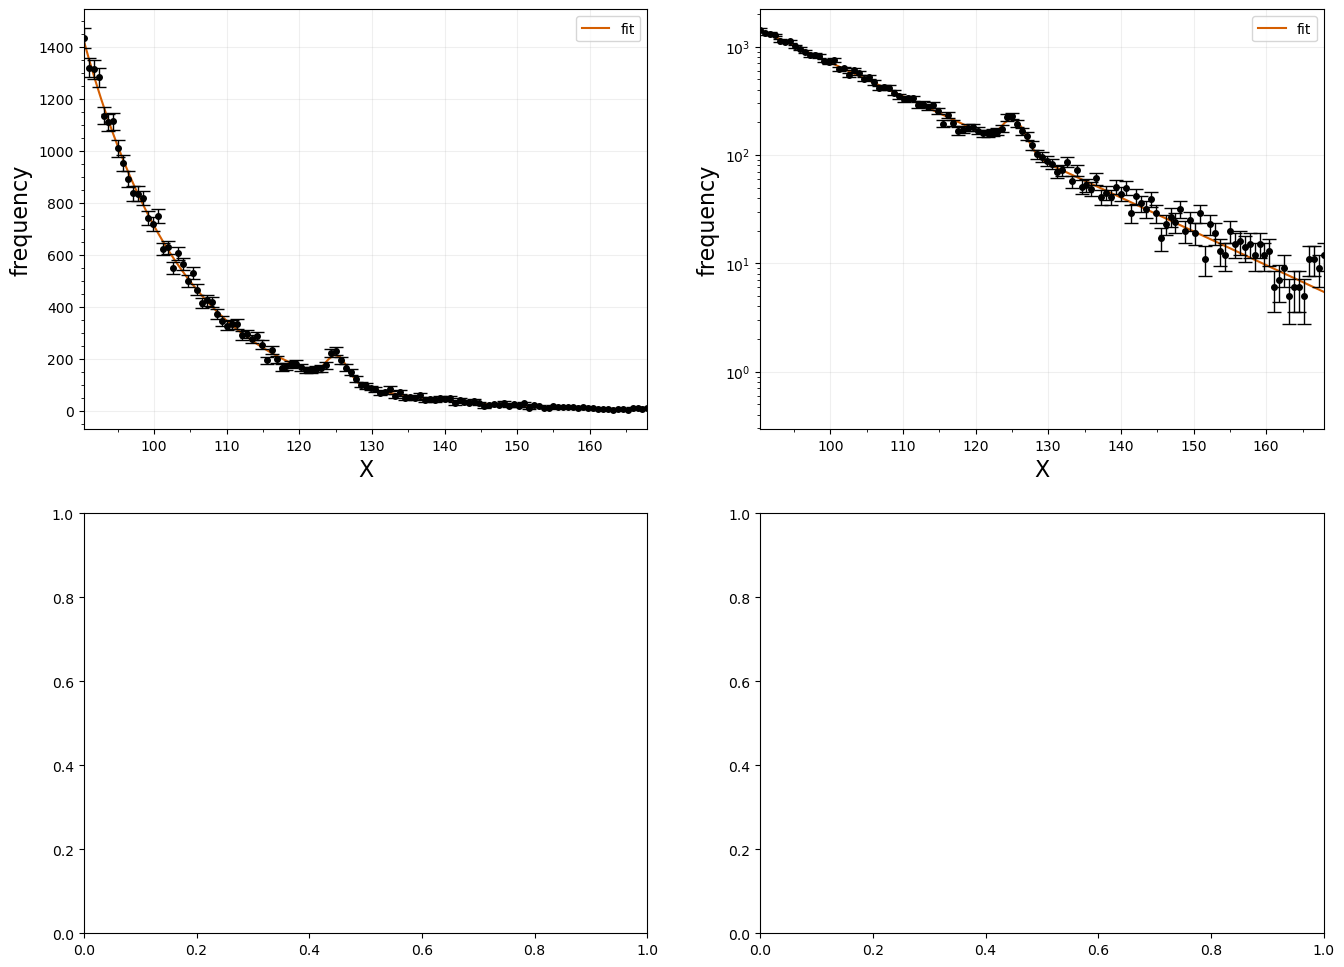

In [100]:
fig, axs = plt.subplots(2,2,figsize = (16,12))

# X Values to use when showing fitted curve
x_min = min(data_x)
x_max = max(data_x)

#fit_x_values1 = np.linspace(x_min,x_max,100)
#fit_x_values2 = np.linspace( mu_value3-5*sigma_value3, mu_value3+5*sigma_value3, 100)
#fit_x_values_list = [fit_x_values1,fit_x_values2]
for rrr in [0,1]:
    # rrr=0 is the standard plot of the whole data
    # rrr=1 zooms in on the interesting part around X=125 anticpating the next question
    for fff in [0,1]:
        # fff=0 is on normal axes, fff=1 is on semilog axes
        if fff==1:
            axs[rrr,fff].set_yscale('log')
        
        if rrr==1: # limit to region around signal
            fit_x_values = np.linspace( mu_value3-5*sigma_value3, mu_value3+5*sigma_value3, 100)
            axs[rrr,fff].set_ylim(50,400)
            axs[rrr,fff].xaxis.set_minor_locator(MultipleLocator(5))
            axs[rrr,fff].xaxis.set_minor_locator(MultipleLocator(1))
        else: # standard plot
            fit_x_values = np.linspace(x_min,x_max,100)
            axs[rrr,fff].xaxis.set_minor_locator(MultipleLocator(20))
            axs[rrr,fff].xaxis.set_minor_locator(MultipleLocator(5))
        
        axs[rrr,fff].set_xlim(min(fit_x_values),max(fit_x_values))

        # for each fit, plot a line
        #fit_param_values = [ v for v in signal_lsq_eg_mobj.values]
        fit_y_values = exp_plus_gauss(fit_x_values, *mobj.values ) 
        axs[rrr,fff].plot( fit_x_values, fit_y_values, color="#D55E00", label= "fit") #fit_form_eg_str")
        axs[rrr,fff].errorbar(data_x, data_y, yerr = data_yerr,
                color='#000000',fmt='.',capsize = 5,ms = 8, elinewidth = 1,capthick = 1)
        axs[rrr,fff].set_ylabel('frequency',fontsize = 16)
        axs[rrr,fff].legend(loc='best')
        if fff==0:
            axs[rrr,fff].yaxis.set_major_locator(MultipleLocator(200))
            axs[rrr,fff].yaxis.set_minor_locator(MultipleLocator(50))

        # labels etc
        axs[rrr,fff].set_xlabel('X',fontsize = 16)
        axs[rrr,fff].grid('xkcd:dark blue',alpha = 0.2)    

## Machine Learning: Data Preprocessing and Evaluation Metrics
<a id='MLGeneral'></a>

### Dataframe Visualisation - Iris Example


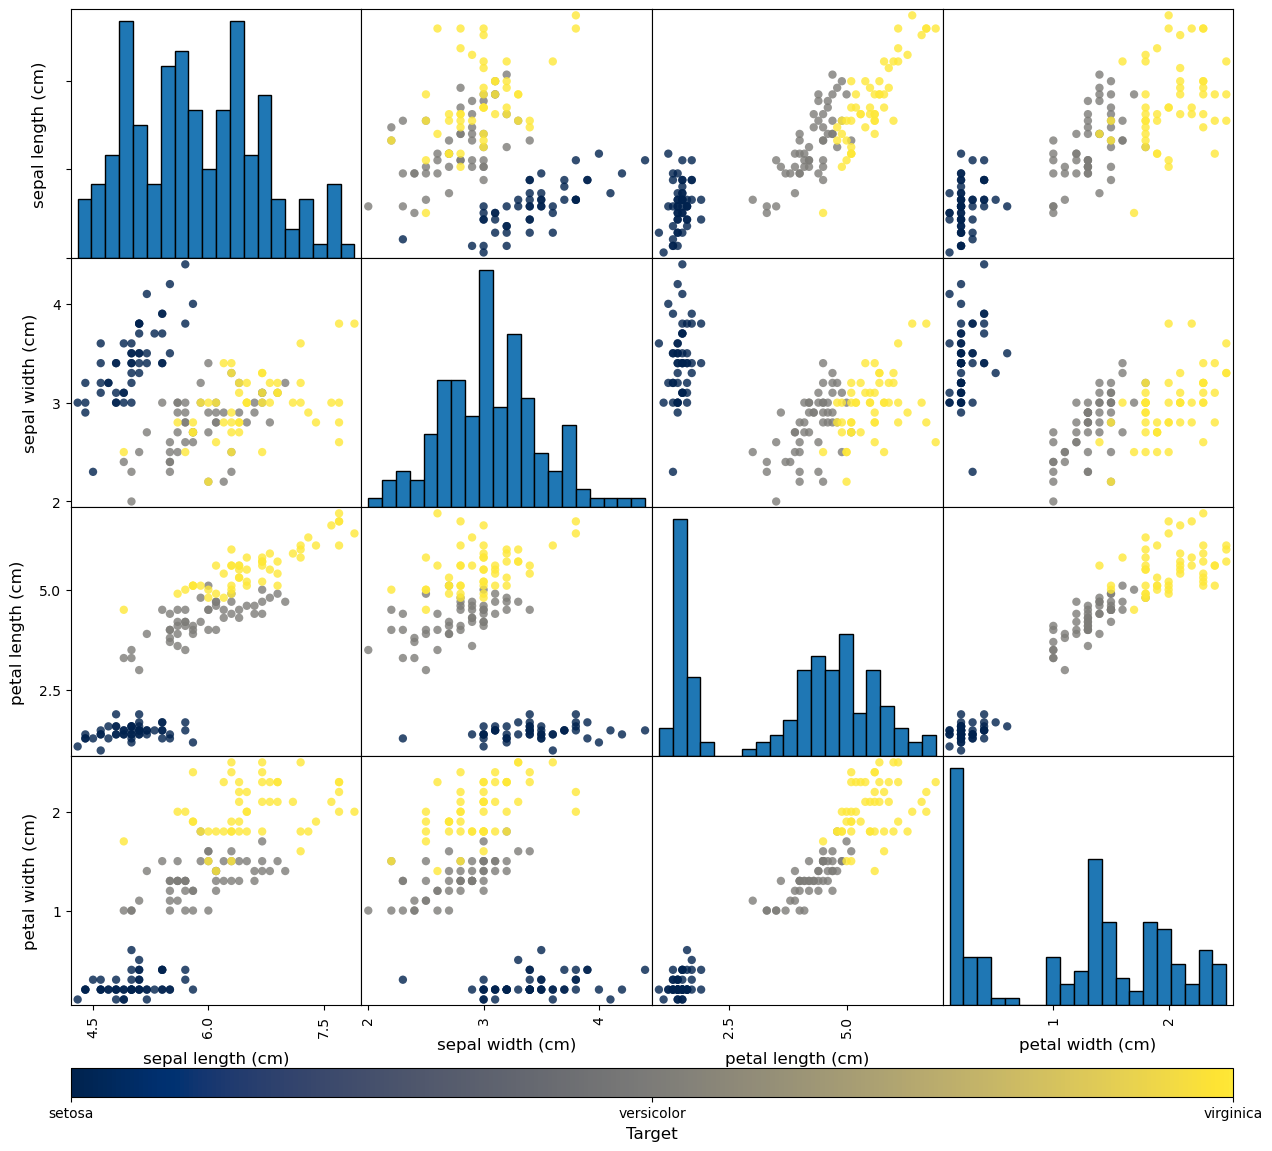

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, cividis

# Load an example dataset
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Map target labels for colorbar
target_names = data.target_names
df['target_label'] = df['target'].apply(lambda x: target_names[x])

# Create a scatter matrix with color-coded targets
cmap = cividis
scatter_matrix = pd.plotting.scatter_matrix(df[df.columns[:-2]], c=df['target'], figsize=(15, 15), marker='o', hist_kwds={'bins': 20, 'edgecolor': 'black'}, alpha=0.8, cmap=cmap)

# Enhance diagonal histograms
for ax in scatter_matrix.diagonal():
    ax.set_xticks([])
    ax.set_yticks([])

# Beautify off-diagonal plots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.set_major_locator(MaxNLocator(3))
    ax.yaxis.set_major_locator(MaxNLocator(3))

# Normalize data for colorbar
norm = Normalize(vmin=np.min(df['target']), vmax=np.max(df['target']))
sm = ScalarMappable(norm=norm, cmap=cmap)

# Create colorbar below the scatter plots
plt.gcf().subplots_adjust(bottom=0.05)  # Adjust layout to make room for the colorbar
colorbar = plt.gcf().colorbar(sm, ax=scatter_matrix.ravel().tolist(), orientation='horizontal', pad=0.05, aspect=40)
colorbar.set_label('Target', fontsize=12)
colorbar.set_ticks(range(len(target_names)))
colorbar.set_ticklabels(target_names)
colorbar.ax.tick_params(labelsize=10)

# Display the plots
plt.show()






### Data Prep - IMPORTANT!

- **Normalise parameters** so that distances are weighted fairly e.g. a 50 year difference should be weighted higher than a £100 difference in the release and budget of a film, despite being smaller in magnitude.
- **Min-max normalization**: Guarantees all features will have the exact same scale but does not handle outliers well.
- `scaler = MinMaxScaler()` & `data = scaler.fit_transform(data)` - sometimes need to reshape data 
- **Z-score normalization**: Handles outliers, but does not produce normalized data with the *exact* same scale.
- Split data 80-20 training set and testing set
- `X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)`
- We then have a dataset of examples along with their ‘labels’

Can combine preprocessing steps and model definition into a `pipeline`, for example:
```python
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

scaler = preprocessing.StandardScaler()
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf',epsilon = epsilon, C = C, gamma = gamma))

```
and then use same as you would any other model.


### Classification Metrics

- `“Accuracy”` is the total number of correct predictions divided by all predictions. Can be misleading —> e.g. always false is an accurate predictor for snow, but never gets what we want
- `“Recall”` is the total True Positives/(True Positives + False Negatives) where we can see the denominator is the total number of True events. i.e. correct snow predictions/snow days. Also struggles with always true giving recall 1 for snow day.
- `“Precision”` is True Positives/(True Positives + False Positives) i.e. correct snow predictions/ total snow predictions (how often a positive prediction is correct)
- `“F1 Score”` is the harmonic mean of precision and recall, and is the best statistic to describe the effectiveness of the model
- `Cross Validation Score` - Break down the training set into a number of smaller sets called folds. You then train your model with all but one of these folds and evaluate with remaining fold. This way you get an array of evaluations to validate individual attempts at training a model. Can then take the mean of the crossval score.
- `Confusion Matrix`: Visualises the errors in the model </br>
  <img src='Confusion_Matrix.png' align='center' width = 350>
- The most relevant statistic depends on the question being asked e.g. maybe we don’t care about having a few false positives, in which case precision would matter less

#### ROC-AUC Score and Plotting

- `ROC-AUC Score`: Used in **binary classification** problems, and indicates how well the model distinguishes between positive and negative classes. (i.e. how separable the classes are).
- Perfect model would score 1, a random model would score 0.5.
```python
best_svc = SVC(C=best_C, kernel = best_kernel, gamma = best_gamma) 
best_svc.fit(X_train,y_train)
RocCurveDisplay.from_estimator(best_svc, X_test, y_test) plt.gca().set_title(f'SVC ROC Curve - C:{best_C}, gamma:{best_gamma}, kernel:{best_kernel}',fontsize = 20)
```
### Regression Metrics

- `RMSE`: Root mean square error between predicted point and label 
- `R Squared (Coefficient of Determination)`: compares the performance of the model against a model that just predicts the mean of the training data; in other words, it tells you how much the model can explain the variance of the data. **independent of scale of data - useful **
- `Goodness of Fit`: Can use tests such as the Kolmogorov-Smirnov test to see how similar the distribution of the real data is compared to our predictions.


<div class="alert alert-block alert-info">
Discuss metric fluctuations -  if small probably just noise rather than a significant difference in model performance

### Plotting Correct/Incorrect Classification for 2 Feature Data

### Plotting Decision Boundary for 2 Feature Classification

## Week 5: KNN Classification
<a id='Week5'></a>
Uses a lot of the general points from above - this is stuff specific for KNN



### Defining Model

```python
k = 5
model = KNeighborsClassifier(n_neighbors = k)
model = model.fit(X_train, y_train)
y_pred = model_normal.predict(X_test_normal)
```

### Optimising #neighbors

- By finding the K nearest neighbours to a new data point, and looking at their labels, we can then classify the new data point
- We then need to choose K such that our “validation accuracy” is maximised
- K too small = “overfitting” (classification depends too heavily on features of small samples), K too large = “underfitting”
- Can also then use for regression i.e. to predict features of a new data point based on it’s neighbours e.g. predicting an imdb rating by taking the weighted (by proximity - see weights = distance argument in KNeighborsRegressor) average of k neighbours.

### Hyperparameters

Make a comprehensive version, with accuracy vs no neighbors plot

### Comprehensive KNN Classifier (MultiFeature)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'Accuracy': 0.96, 'Precision': 0.9610305958132046, 'Recall': 0.9591378536147284, 'F1 Score': 0.9598354861512757}


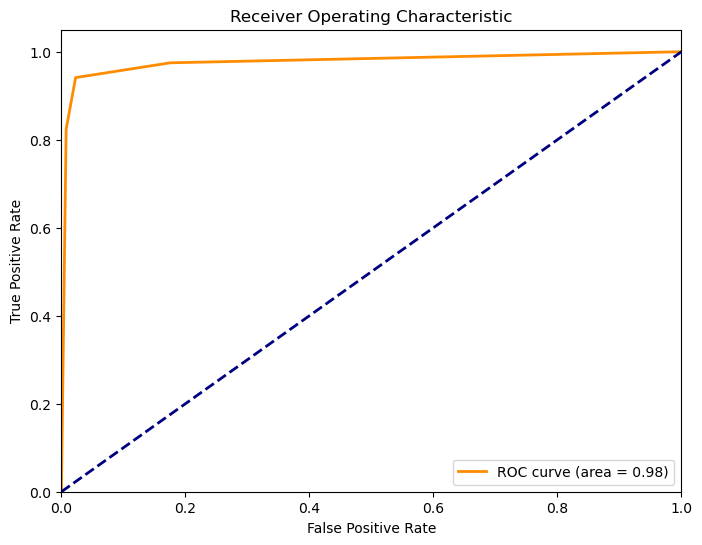

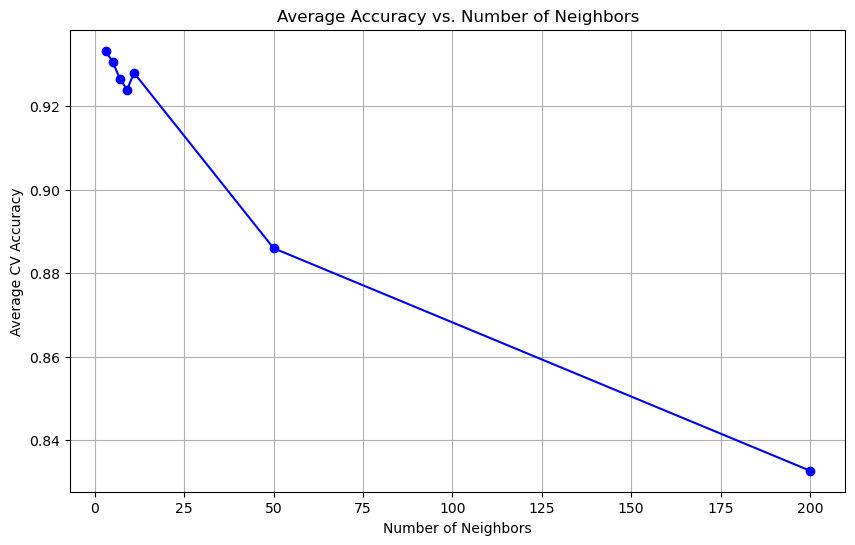

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, make_scorer

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=37)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline with scaling and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11,50,200],
    'knn__weights': ['uniform', 'distance']
}

# Create scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(evaluate_classification_model(best_model, X_test, y_test))

# Compute ROC curve and AUC
plot_roc_curve(best_model, X_test, y_test)

# Retrieve all combinations of parameters and corresponding scores
all_params = grid_search.cv_results_['params']
accuracy_scores = grid_search.cv_results_['mean_test_accuracy']

# Prepare a dictionary to store average scores for each number of neighbors
accuracy_by_neighbors = {}

# Populate the dictionary with scores, averaging where multiple entries for the same number of neighbors exist
for params, score in zip(all_params, accuracy_scores):
    n_neighbors = params['knn__n_neighbors']
    if n_neighbors in accuracy_by_neighbors:
        accuracy_by_neighbors[n_neighbors].append(score)
    else:
        accuracy_by_neighbors[n_neighbors] = [score]

# Calculate the average accuracy for each number of neighbors
for n_neighbors, scores in accuracy_by_neighbors.items():
    accuracy_by_neighbors[n_neighbors] = np.mean(scores)
# Plotting
neighbors = sorted(accuracy_by_neighbors.keys())
average_scores = [accuracy_by_neighbors[n] for n in neighbors]

plt.figure(figsize=(10, 6))
plt.plot(neighbors, average_scores, marker='o', linestyle='-', color='b')
plt.title('Average Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average CV Accuracy')
plt.grid(True)
plt.show()

#Plot Results - only for 2 features
#plot_classification_results(best_model,X_train, y_train, X_test, y_test)

### Comprehensive KNN Regressor

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Best Model's RMSE: 115.4702579088663
Best Parameters: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
   param_knn__n_neighbors param_knn__weights  mean_test_RMSE  rank_test_RMSE
21                     11           distance      122.801164               1
17                      9           distance      122.925262               2
20                     11            uniform      123.103614               3
19                     10           distance      123.141794               4
16                      9            uniform      123.165072               5
23                     12           distance      123.384009               6
25                     13           distance      123.391330               7
18                     10            uniform      123.431527               8
22                     12            uniform      123.760835               9
24                     13            uniform      123.783599 

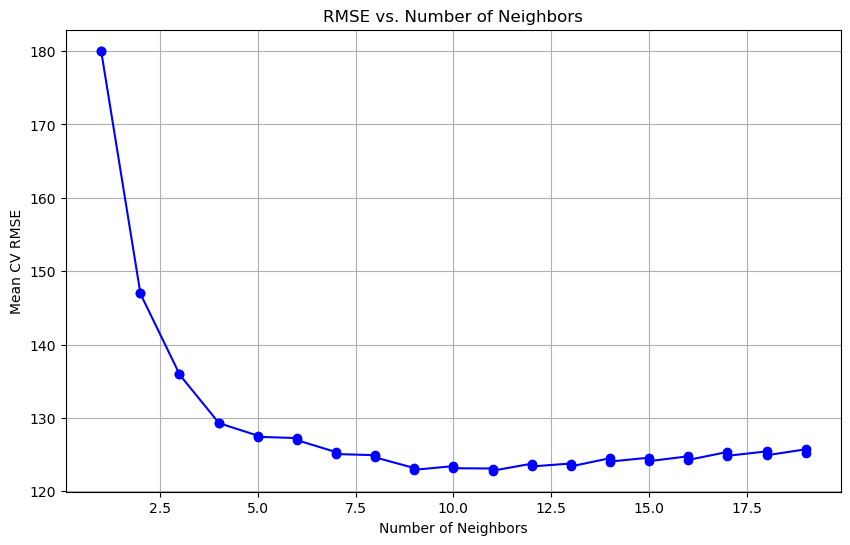

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer

X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a pipeline with scaling and KNN regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': range(1, 20),  # Testing a range from 1 to 20 neighbors
    'knn__weights': ['uniform', 'distance']  # Weight types to consider
}

# Define scoring functions, including RMSE
scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False)
}

# Setup the GridSearchCV with RMSE as the metric for refitting
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring=scoring, refit='RMSE')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Best Model's RMSE: {rmse}")
print(f"Best Parameters: {grid_search.best_params_}")

# Create DataFrame from the cv_results_
results_df = pd.DataFrame(grid_search.cv_results_)

# We're interested in columns relevant to parameters and the RMSE score
results_df = results_df[['param_knn__n_neighbors', 'param_knn__weights', 'mean_test_RMSE', 'rank_test_RMSE']]

# Convert RMSE scores to positive as they are negative for minimization
results_df['mean_test_RMSE'] = -results_df['mean_test_RMSE']

# Sort the DataFrame by RMSE
sorted_results_df = results_df.sort_values(by='mean_test_RMSE', ascending=True)

# Display the sorted DataFrame
print(sorted_results_df)

neighbors = [params['knn__n_neighbors'] for params in results['params']]
rmse_scores = -results['mean_test_RMSE']  # Negative RMSE because GridSearchCV uses negative values for loss functions

plt.figure(figsize=(10, 6))
plt.plot(neighbors, rmse_scores, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV RMSE')
plt.grid(True)
plt.show()


## Week 6: Support Vector Machines (SVM)
<a id='Week6'></a>


### SVM Classification (SVC)

SVMs specifies a boundary in the vector space where the data points are defined. Depending on what side of the boundary/hyperplane the undefined point is, it can be classified.

- **Support Vectors** are the data points (training set) closes to the boundary
- They are used to define the boundary
- **Margin** is the distance between ONE support vector and the boundary
- We optimise an SVM by maximising the margin. By creating as much distance between the data points and the boundary as possible, we reduce the number of incorrect classifications.
- SVMs are faster because we can ignore all other data points


<img src="support_vector_graphic.jpeg" width = 800 />


### Hyperparameters

- `C`: Regularisation parameter that controls tradeoff between maximising margin and minimising classification error. Smaller C value = larger margin but may then lead to more misclassifications.
- `kernel`: Determines the nature of the hyperplane used to separate classes by maximising the margin between the two classes. The margin is the distance between the hyperplane and the nearest data point from either class, also known as support vectors. If the data is not linearly separable, certain kernels are able to transform the data into higher dimensions to separate.
- `gamma`: parameter for non-linear hyperplanes. The higher the gamma value, the more the model tries to exactly fit the training data set.

Example values 
```python
Cs = [0.1, 1, 10, 100] #penalty parameter - trades off smooth decision boundary and classifying points correctly
kernels = ['linear', 'rbf', 'poly'] #the nature of the hyperplane used to separate data (create boundaries between points for classification)
gammas = [0.1, 1, 10, 100] #how hard it tries to fit the data
```

### Defining and Training a Model

```python
svc = SVC()

# Define the grid of parameters to search
param_grid = {'C': [0.1, 1, 10, 100],  # Penalty parameter C of the error term
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],  # Kernel coefficient for 'rbf' and 'poly'
              'kernel': ['rbf', 'linear', 'poly']}  # Kernel type

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
```

### Metrics
```python
# Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Accuracy:", test_score)

# Calculate mean cross-validation score
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Mean CV Score:", mean_cv_score)

# Calculate ROC AUC score
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC Score:", roc_score)
```


### Comprehensive SVC Example

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
{'Accuracy': 0.996, 'Precision': 0.9954545454545455, 'Recall': 0.9956140350877193, 'F1 Score': 0.9954940326378177}


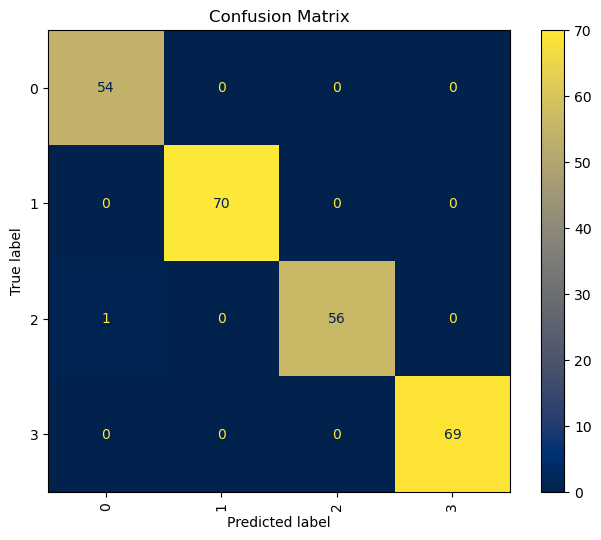

ValueError: multiclass format is not supported

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Create a synthetic dataset with more clearly separated classes
X, y = make_classification(n_samples=1000, n_classes = 4, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           class_sep=5, random_state=35)  # Increase `class_sep` for clearer separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Plotting the generated data - only for two feature data
#plt.figure(figsize=(10, 8))
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolor='k', s=50)
#plt.title('Initial Data Distribution')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.colorbar(label='Class')
#plt.show()

# Setup the pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))
])

# Parameters for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.1,0.5, 1.0, 2.0, 10.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
print("Best parameters:", grid_search.best_params_)
print(evaluate_classification_model(best_model, X_test, y_test))

# Confusion Matrix
plot_confusion_matrix(best_model, X_train, y_train, X_test, y_test, np.unique(y))

#Plot ROC Curve - only for binary classification
plot_roc_curve(best_model, X_test, y_test)

#Plot Results - only for 2 features
#plot_classification_results(best_model,X_train, y_train, X_test, y_test)


### SVM Regression (SVR)

Uses decision boundary to predict points based on features.

<img src="https://miro.medium.com/v2/resize:fit:1100/1*XE9jt0r1yAW8LnliQ3mllQ.png" width = 800 />

### Hyperparameters
Same hyperparameters as SVC plus:
- `Epsilon`: $\varepsilon$ specifies the region where we do not care if the model prediction is not accurate. Note: see how the support vectors in this case are the vectors **outside** of the margin, rather than those inside. This is one of the key differences between support vector regression and support vector classification.

### Defining and Training Model

```python
svr = SVR()

# Define the grid of parameters to search
param_grid = {'C': [0.1, 1, 10, 100],  # Penalty parameter C of the error term
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],  # Kernel coefficient
              'kernel': ['rbf', 'linear', 'poly']}  # Kernel type

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
```
### Metrics
```python
# Evaluate the model on the test set
test_predictions = grid_search.predict(X_test)

# Calculate rmse
rmse = mean_squared_error(y_test, test_predictions, squared =  False)
print("Mean Squared Error:", rmse)

# Calculate R^2 score
r2 = r2_score(y_test, test_predictions)
print("R^2 Score:", r2)
```

### Comprehensive SVR Example

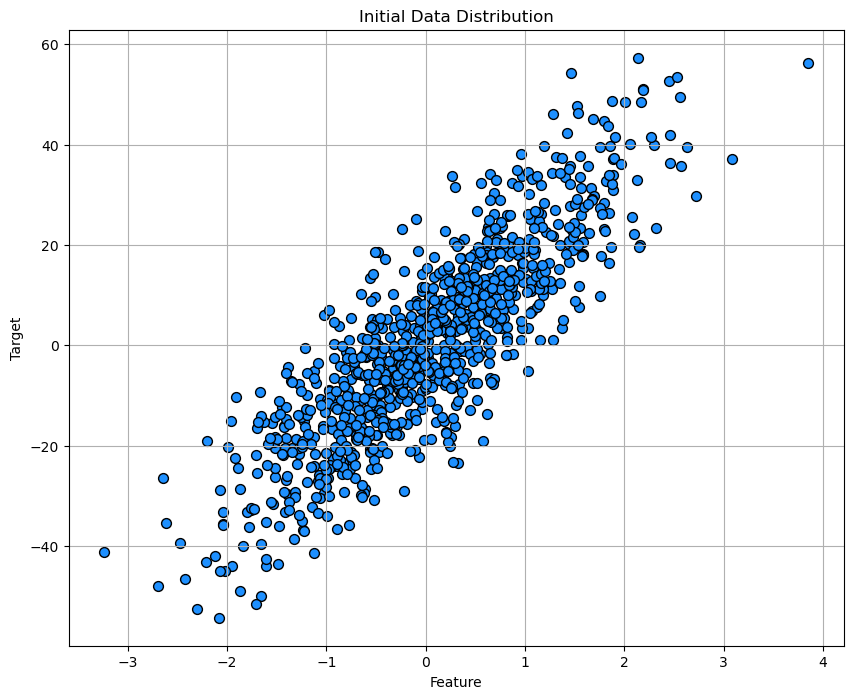

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'MSE': 104.71705212037807, 'RMSE': 10.233135009388768, 'R^2': 0.7090981208530271}


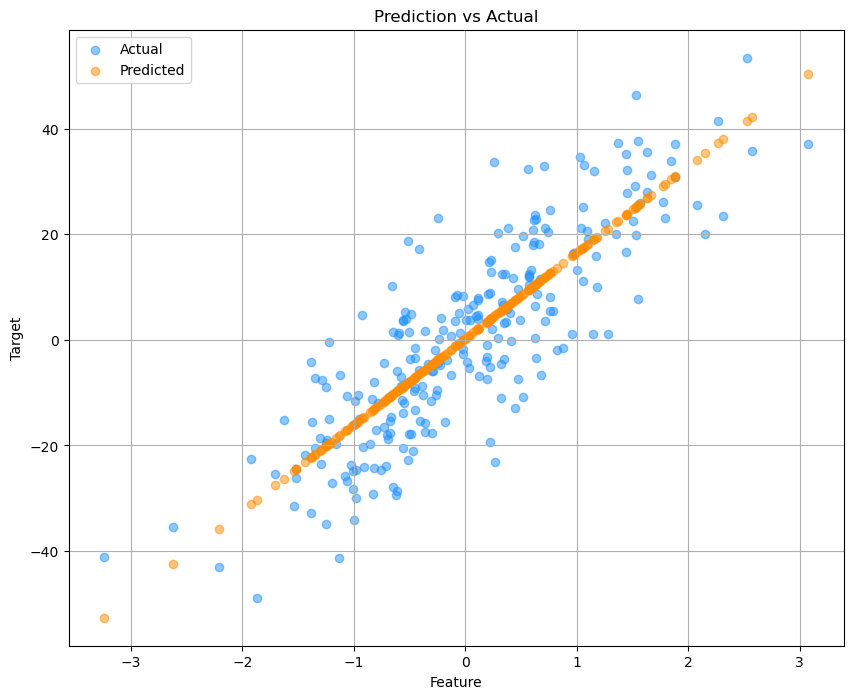

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Plotting the generated data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, color='dodgerblue', marker='o', edgecolor='k', s=50)
plt.title('Initial Data Distribution')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

# Setup the pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Parameters for GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': ['scale', 'auto']
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
print(evaluate_regression_model(best_model, X_test, y_test))

# Plotting predictions against true values
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], y_test, color='dodgerblue', label='Actual', alpha=0.5)
plt.scatter(X_test[:, 0], y_pred, color='darkorange', label='Predicted', alpha=0.5)
plt.legend()
plt.title('Prediction vs Actual')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()


## Week 7: Performance Metrics (Extended)
<a id='Week7'></a>

Written these out in the metrics part above.

## Week 8: Decision Trees
<a id='Week8'></a>


- For decision trees, each **node** represents a subset of the total data.
- **Internal Nodes** represent the feature on which we split the data.
- Once we are done splitting the data based on features, we reach a **leaf**
- **Gini Impurity** - a measure of the overlap between leaves, and “Information Gain (Weighted)” (helps decide best features to split on) - change in gini impurity before and after splitting. 

- Limitations of decision trees are that: larger trees overfit the training data —> pruning (by setting the max depth of the tree) neccessary, and that when making the tree we use the greedy approach, such that at each split we always take the largest information gain, despite that perhaps taking a suboptimal IG would result in larger IGs down the line

<img src='tree_structure_schematic_final.svg' width=800>

### Random Forests:
- A **random forest** is an ensemble machine learning technique — a random forest contains many decision trees that all work together to classify new points. When a random forest is asked to classify a new point, the random forest gives that point to each of the decision trees. Each of those trees reports their classification and the random forest returns the most popular classification. It’s like every tree gets a vote, and the most popular classification wins.
- This counteracts the limitations of individual trees, such as overfitting
- **Bagging**: a different subset of the data is used to create each tree
- **Feature Bagging**: choosing a subset of features for each tree to use
- <img src='random_forest_graphic.png' width=800>

### Boosted Forests:
cba 


### Hyperparameters
- `max_depth`: The maximum depth of the tree. If this is not specified in the Decision Tree, the nodes will be expanded until all leaf nodes are pure or until all leaf nodes contain less than min_samples_split.
- `min_samples_leaf`: The minimum samples required to be at a leaf node. Therefore, a split can only happen if it leaves at least the min_samples_leaf in both of the resulting nodes.
- `min_samples_split`: The minimum samples required to split an internal node. If the amount of sample in an internal node is less than the min_samples_split, then that node will become a leaf node.
- For **random forest** - `n_estimators`: numbers of trees in forest
- For **xgb boosted tree** - `learning_rate`: optional parameter where step size shrinkage prevents overfitting.

### Defining and Training a Model
```python
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

```
Same process using gridsearchcv for all.

### Plotting 

This visualises the decision tree:
```python
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)
```
e.g. <img src='https://inria.github.io/scikit-learn-mooc/_images/970428d5c73bf00c11a2b6e9b9050ebb28a605a272444de31bf528ccad5ab678.png' width=500>


### Metrics
Choose any suitable metrics e.g. for classification can use accuracy and ROC-AUC - see SVCs above.

### Comprehensive RF Classifier (2 features)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


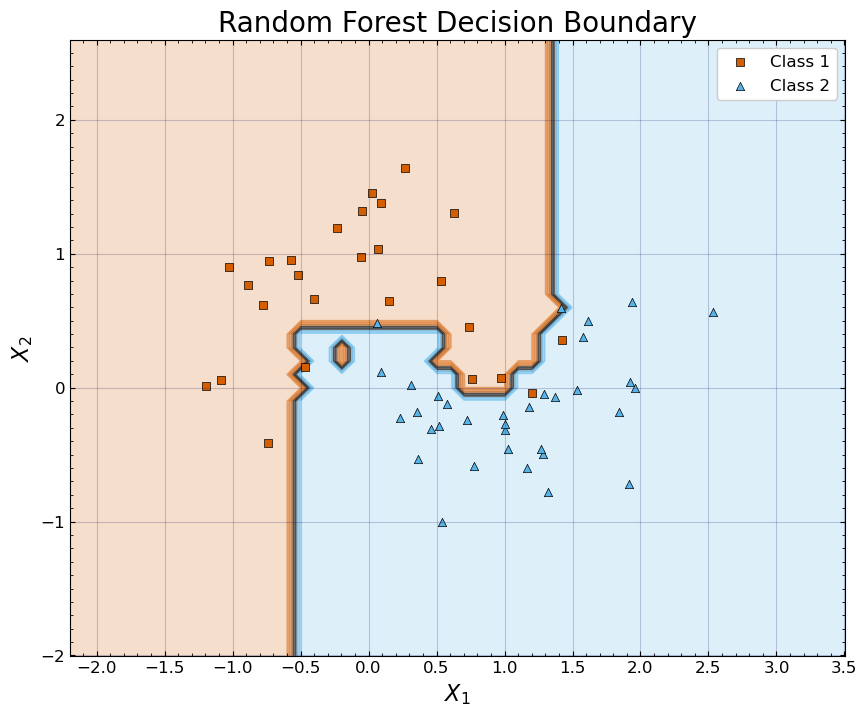

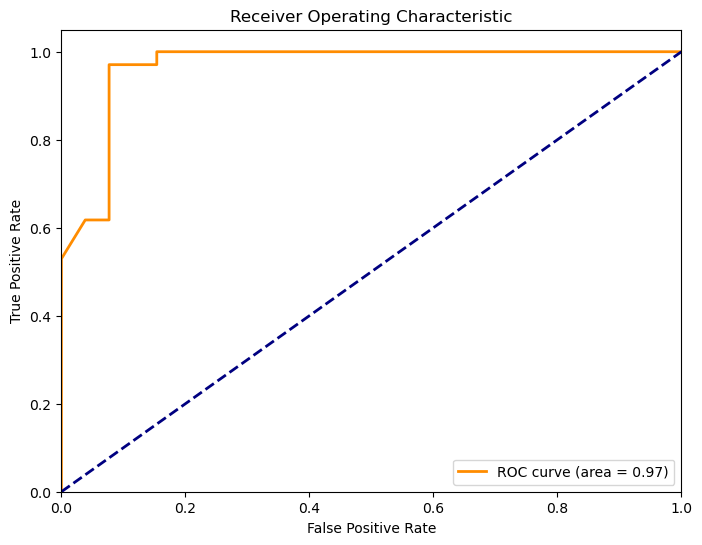

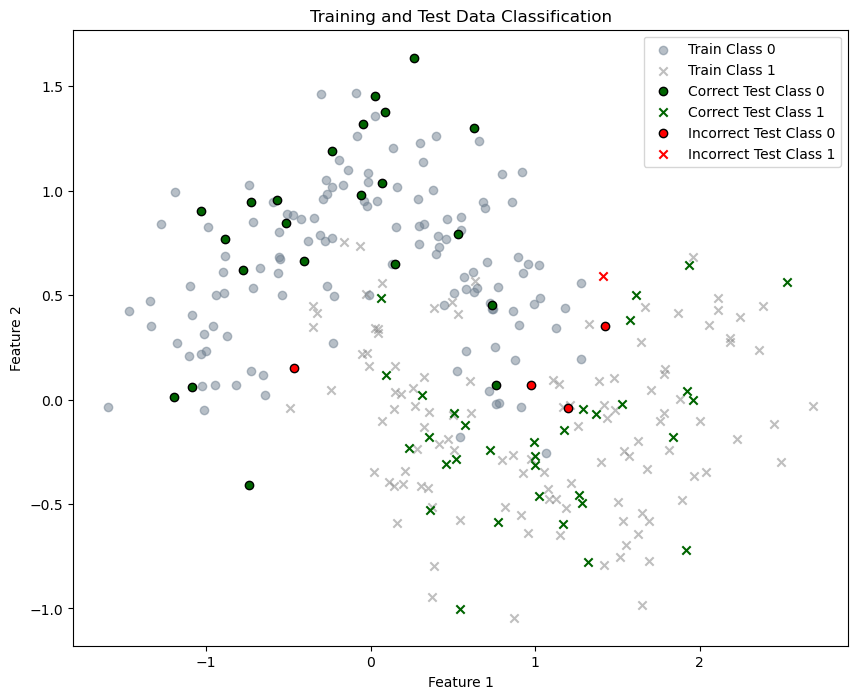

{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [141]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle
from sklearn.datasets import make_moons

#X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.5, 0.5], flip_y=0, random_state=1)

X, y = make_moons(n_samples = 300, noise = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, oob_score=True))
])

param_grid = {
    'classifier__max_depth': [2, 5, 10],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

scoring = {
    'Accuracy': 'accuracy',
    'AUC': 'roc_auc',
    'F1': 'f1'
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='Accuracy', return_train_score=False, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

#Plot Decision Boundary
plot_decision_boundary(best_model,X_test, y_test, ax, 'Random Forest Decision Boundary')
#Plot ROC Curve
plot_roc_curve(best_model, X_test, y_test)
#Evaluate on test data
evaluate_classification_model(best_model, X_test, y_test)
#Plot results
plot_classification_results(best_model, X_train, y_train, X_test, y_test)

#with open('best_random_forest_classifier.pkl', 'wb') as f:
    #pickle.dump(grid_search.best_estimator_, f)

print(grid_search.best_params_)


### Comprehensive RF Regressor (2 features)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 30, 'regressor__n_estimators': 500}
RMSE on Test Data: 1.0302611744081254
R2 on Test Data: 0.8057329284980008


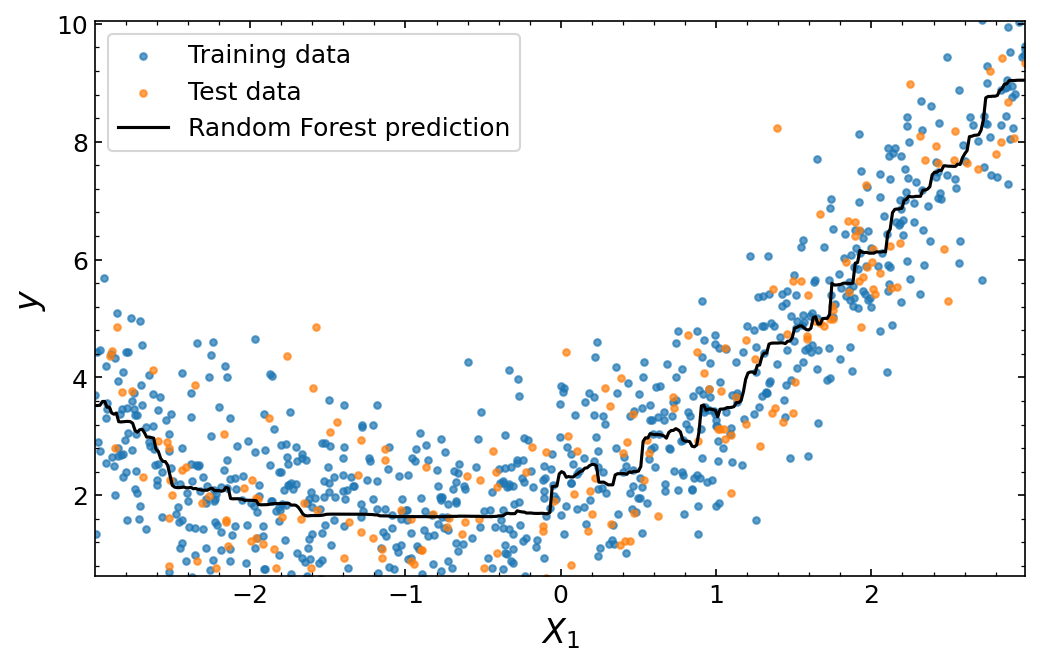

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pickle

# Step 1: Generate synthetic data
#X, y = make_regression(n_samples=1000, n_features=1, noise=0.9, random_state=35)
X = 6*np.random.rand(1000,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(1000,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Step 2: Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42, oob_score=True))
])

# Step 3: Set up GridSearchCV
param_grid = {
    'regressor__max_depth': [2, 5, 10],
    'regressor__n_estimators': [50, 100, 200, 500],
    'regressor__min_samples_split': [10, 20, 30],
    'regressor__min_samples_leaf': [1, 2, 4]
}

scoring = {
    'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'R2': 'r2'
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='RMSE', return_train_score=False, verbose=1)
grid_search.fit(X_train, y_train)

# Step 4: Evaluate the model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print("Best parameters:", grid_search.best_params_)
print("RMSE on Test Data:", rmse)
print("R2 on Test Data:", r2)

# Step 5: Save the best model
with open('best_random_forest_regressor.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Step 6: Plotting
xs = np.linspace(X.min(), X.max(), 400)
ys = best_model.predict(xs.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=(8, 24/5), dpi=150)
ax.scatter(X_train, y_train, color='#1f77b4', s=10, label='Training data', alpha=0.7)
ax.scatter(X_test, y_test, color='#ff7f0e', s=10, label='Test data', alpha=0.7)
ax.plot(xs, ys, color='black', label='Random Forest prediction')

ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(min(ys) - 1, max(ys) + 1)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.4))
ax.tick_params(direction='in', top=True, right=True, labelsize=12, which='both')
ax.legend(loc='upper left', fontsize=12)
plt.show()


## Week 9: Neural Networks
<a id='Week9'></a>


<img src='neural_network_graphic.png' width=800>

### Pytorch Basics

#### Tensors
Tensors are defined with a single datatype
```python
X_int = torch.tensor([1,2,3,4],dtype = torch.int) # 32 bit integer
X_float = torch.tensor([1,2,3,4],dtype = torch.float) # 32 bit float
X_bool = torch.tensor([0,1,1,0], dtype = torch.bool) # Boolean
```
Some handy methods:
```python
empty = torch.empty(3,5) # Empty array of shape (3, 5)
ran = torch.rand(2, 4) # 
zeros = torch.zeros(2,3,4) # Array of 0s of shape (2, 3, 4)
ones = torch.ones(6) # Array of 1s of shape (6,)
```

#### Datasets and Dataloaders

**Datasets** pair each 'coordinate' with it's target.

**Dataloaders** manage the data and allow us to iterate over the points.

e.g. 
```python
dataset = TensorDataset(X_tensor,y_tensor) #pairs each coordinate with it's target

train_dataset, val_dataset, test_dataset = random_split(dataset, lengths = [0.6,0.2,0.2])

# Define training and validation DataLoaders --> these manage the data and let us loop through
dloader_train = DataLoader(train_dataset, batch_size = 32, shuffle = True)
dloader_validate = DataLoader(val_dataset, batch_size = 32, shuffle = True)
```

### Hyperparameters

- `Number of Layers`:
- `Activation Functions`:
- `Regularisation`: 
- `Epochs`: Number of times the model sees the whole dataset during training
- `Loss Function`: 

### Defining and Training a Model

#### Defining models and optimizers
This is an example where we would like to vary the activation function used between layers. The number of layers, and the number of neurons in each layer can be customised.

**N.B.** - linear has format (inputs per neuron, outputs per neuron) and every output from the previous neurons needs to go to every neuron in next layer. Therefore, must have as many neurons in next layer as outputs per neuron in previous layer. See diagram for clarity.

```python
models = {}
activ_funcs = {'sigmoid':nn.Sigmoid(),
               'tanh':nn.Tanh(),
               'ReLU':nn.ReLU(),
               'LeakyReLU':nn.LeakyReLU(),
               'ELU':nn.ELU(),
               'Swish':nn.SiLU()}

for key in activ_funcs.keys():
    torch.manual_seed(42)
    models[key] = nn.Sequential(nn.Linear(784, 512),
                                activ_funcs[key],
                                nn.Linear(512, 256),
                                activ_funcs[key],
                                nn.Linear(256, 256),
                                activ_funcs[key],
                                nn.Linear(256, 128),
                                activ_funcs[key],
                                nn.Linear(128, 10),
                                nn.Sigmoid())
    
optimizers = {}
for key in activ_funcs.keys():
    optimizers[key] = torch.optim.SGD(models[key].parameters(), lr = 0.01, momentum = 0.9) #fetches the parameters to be optimized for each model
```



#### Defining a Training Function

```python
# Importing the tqdm library to create progress bars
from tqdm import tqdm

# Defining a function 'train_epoch' that takes a model, optimizer, and epoch number as inputs
def train_epoch(model, optimizer, epoch):
    
    # Setting the model to training mode
    model.train()
    
    # Initializing variables to track total loss during training and validation
    tot_loss = 0
    valid_loss = 0
    
    # Initializing variables to track the number of correct predictions and total samples for training
    true_preds, count = 0., 0
    
    # Looping through each batch
    for X_train, y_train in tqdm(train_dloader, desc=f"Epoch {epoch+1}", leave=False):
        
        # Flattening the input data 'X_train' 
        X_train = X_train.view(X_train.size(0), -1)
        
        # Passes batch through model
        y_pred = model(X_train)
        
        # Zeroing the gradients of the model parameters
        optimizer.zero_grad()
        
        # Calculating the loss between predicted output 'y_pred' and actual labels 'y_train'
        loss = loss_fcn(y_pred, y_train)
        
        # Summing the total loss
        tot_loss += loss.item() #.item pulls out scalar value of tensor
        
        # Calculates and backpropagates the gradients of the loss with respect to the model parameters
        loss.backward()
        
        # Updating the model parameters using the optimizer
        optimizer.step()
        
        # Calculating the number of correct predictions in the batch
        true_preds += (y_pred.argmax(dim=-1) == y_train).sum()
        
        # Counting the total number of samples processed in the batch
        count += y_train.shape[0]
    
    # Computing training accuracy
    train_acc = true_preds / count
    
    # Initializing variables to track the number of correct predictions and total samples for validation
    vtrue_preds, vcount = 0., 0
    
    # Looping through the validation data
    for X_valid, y_valid in valid_dloader:
        
        # Turning off gradient tracking since no backpropagation is needed during validation
        with torch.no_grad():
            
            # Flattening the input data 'X_valid' 
            X_valid = X_valid.view(X_valid.size(0), -1)
            
            # Forward pass: computing the predicted output 'y_pred_v' by passing input data through the model
            y_pred_v = model(X_valid)
            
            # Calculating the loss between predicted output 'y_pred_v' and actual labels 'y_valid'
            vloss = loss_fcn(y_pred_v, y_valid)
            
            # Accumulating the validation loss
            valid_loss += vloss.item()
            
            # Calculating the number of correct predictions in the validation set
            vtrue_preds += (y_pred_v.argmax(dim=-1) == y_valid).sum()
            
            # Counting the total number of samples in the validation set
            vcount += y_valid.shape[0]
    
    # Computing validation accuracy
    val_acc = vtrue_preds / vcount
    
    # Printing training and validation accuracy for the epoch
    print(f"[Epoch {epoch+1:2d}] Training accuracy: {train_acc*100.0:05.2f}%, Validation accuracy: {val_acc*100.0:05.2f}%")
    
    # Returning the average training loss, average validation loss, and validation accuracy for the epoch
    return tot_loss / len(dataset_train), valid_loss / len(dataset_validate), val_acc
```

### Comprehensive Neural Network Binary Classifier

/var/folders/xc/pd41nf9128x4bsnxjp4_gzd80000gn/T/ipykernel_27598/3024918517.py:126: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)


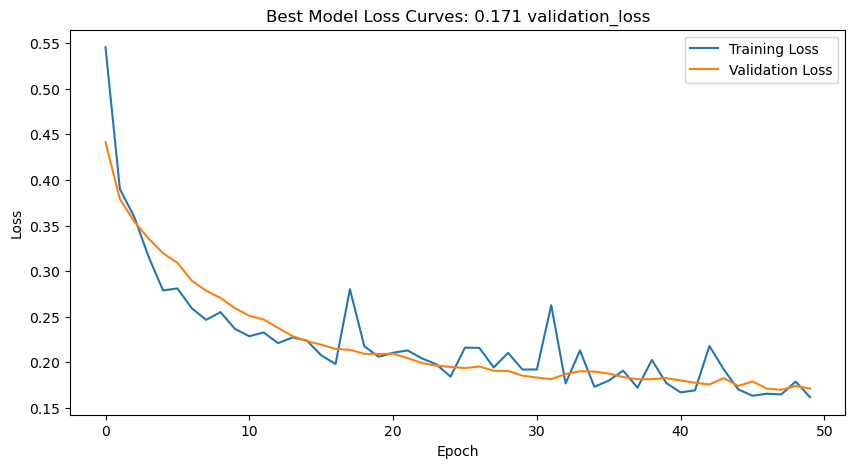

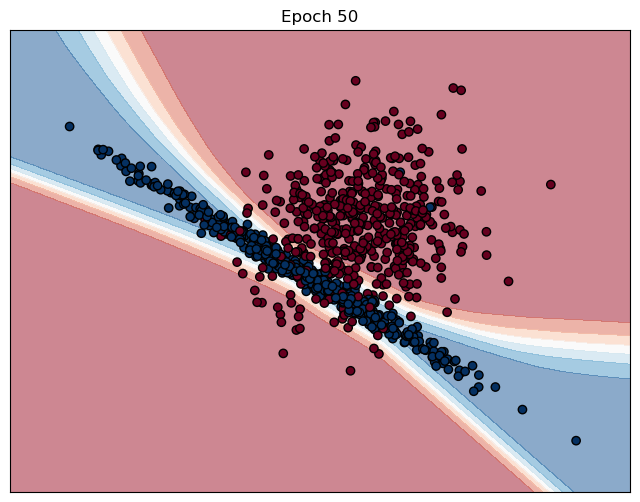

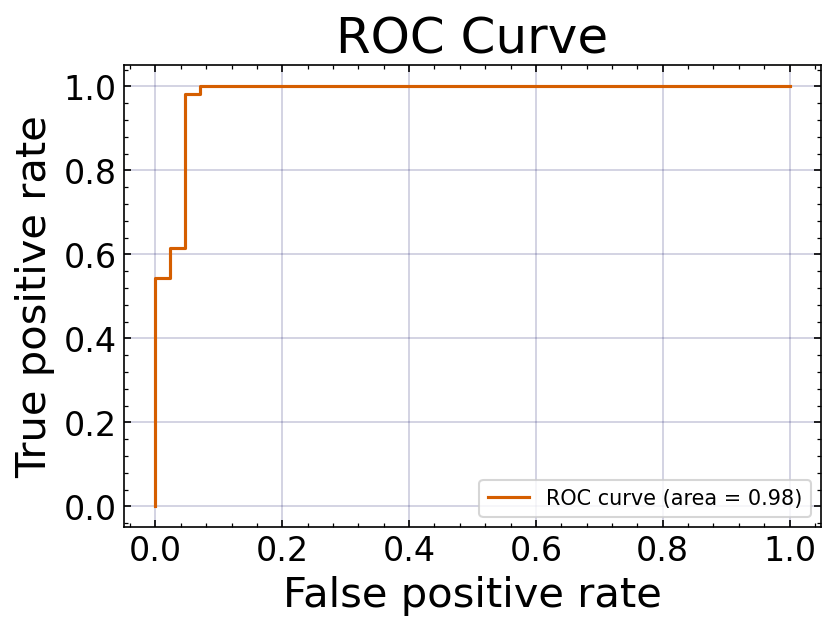

,hidden_neurons,activ_functions,learning_rate,train_accuracy,validation_accuracy,validation_roc_score,validation_loss
2,20,sigmoid,0.001,0.9000,0.84,0.819665,0.527576
11,50,sigmoid,0.001,0.9075,0.86,0.837209,0.440776
20,100,sigmoid,0.001,0.9075,0.86,0.837209,0.396517
8,20,Swish,0.001,0.9100,0.86,0.837209,0.391797
5,20,ReLU,0.001,0.9125,0.87,0.848837,0.363865


{'Accuracy': 0.944, 'Precision': 0.9028776978417267, 'Recall': 0.996031746031746, 'F1 Score': 0.9471698113207546}


In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def plot_decision_boundary(model, X, y, epoch, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    preds = model(grid_tensor).reshape(xx.shape)
    ax.contourf(xx, yy, preds.detach().numpy(), alpha=0.5, cmap='RdBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k')
    ax.set_title(f"Epoch {epoch+1}")
    ax.set_xticks([])
    ax.set_yticks([])

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.5, random_state=36)  # Increase `class_sep` for clearer separation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

# Convert data to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Datasets and Dataloaders
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Hyperparameters
hidden_neurons = [20, 50, 100]
activ_functions = {'sigmoid': nn.Sigmoid(), 'ReLU': nn.ReLU(), 'Swish': nn.SiLU()}
learning_rates = [0.01, 0.005, 0.001]
epochs = 50
plot_decision = True #This only works for two input features

loss_fcn = nn.BCELoss(reduction='mean')
results_df = pd.DataFrame(columns=['hidden_neurons', 'activ_functions', 'learning_rate', 'train_accuracy', 'validation_accuracy', 'validation_roc_score'])

# Define training function
def train_model(model, optimizer, epochs=50):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch).squeeze()
            loss = loss_fcn(output, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                output = model(X_batch).squeeze()
                loss = loss_fcn(output, y_batch)
                total_val_loss += loss.item()
        val_losses.append(total_val_loss / len(val_loader))

    y_train_pred = torch.round(model(X_train_t)).detach().numpy()
    y_val_pred = torch.round(model(X_val_t)).detach().numpy()

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_roc = roc_auc_score(y_val, y_val_pred)
    val_probs = model(X_val_t).detach().numpy()

    return {
        'train_accuracy': train_acc,
        'validation_accuracy': val_acc,
        'validation_roc_score': val_roc,
        'train_loss': train_losses[-1],
        'validation_loss': val_losses[-1],
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses
    }

best_model_info = None
best_metric_value = float('inf')  # Adjust this depending on whether a lower or higher metric is better
best_metric_name = 'validation_loss'  # Can be changed to 'train_accuracy', 'validation_accuracy', 'train_loss', or 'validation_loss'

# Iterate over different configurations
for n in hidden_neurons:
    for activation_name, activation in activ_functions.items():
        for lr in learning_rates:
            model = nn.Sequential(
                nn.Linear(2, n), #remember to change this to match the number of input features
                activation,
                nn.Linear(n, 1),
                nn.Sigmoid()
            )
            optimizer = optim.Adam(model.parameters(), lr=lr)
            metrics = train_model(model, optimizer, epochs)

            new_row = {
                'hidden_neurons': n,
                'activ_functions': activation_name,
                'learning_rate': lr,
                'train_accuracy': metrics['train_accuracy'],
                'validation_accuracy': metrics['validation_accuracy'],
                'validation_roc_score': metrics['validation_roc_score'],
                'validation_loss': metrics['validation_loss']
            }
            results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

            # Determine if the current model is the best
            current_metric_value = metrics[best_metric_name]
            if (best_metric_name in ['train_loss', 'validation_loss'] and current_metric_value < best_metric_value) or \
               (best_metric_name not in ['train_loss', 'validation_loss'] and current_metric_value > best_metric_value):
                best_metric_value = current_metric_value
                best_model_info = metrics
                torch.save(model, 'best_model.pt')

model = torch.load('best_model.pt')
# Plotting for the best model if it exists
if best_model_info:
    plt.figure(figsize=(10, 5))
    plt.plot(best_model_info['train_losses'], label='Training Loss')
    plt.plot(best_model_info['val_losses'], label='Validation Loss')
    plt.title(f'Best Model Loss Curves: {best_metric_value:.3f} {best_metric_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot decision boundary
    if plot_decision == True:
        fig, ax = plt.subplots(figsize=(8, 6))
        plot_decision_boundary(best_model_info['model'], X, y, epochs - 1, ax)

    # ROC curve plotting
    plot_roc_curve_t(model,X_val_t,y_val_t)


# Print the results
display(results_df.sort_values('validation_loss', ascending = False).head())

#Print test data evaluation
print(evaluate_classification_model_t(model,X_test_t,y_test_t))

### Comprehensive Neural Network Regressor (California Housing)

/var/folders/xc/pd41nf9128x4bsnxjp4_gzd80000gn/T/ipykernel_27598/4196308957.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)


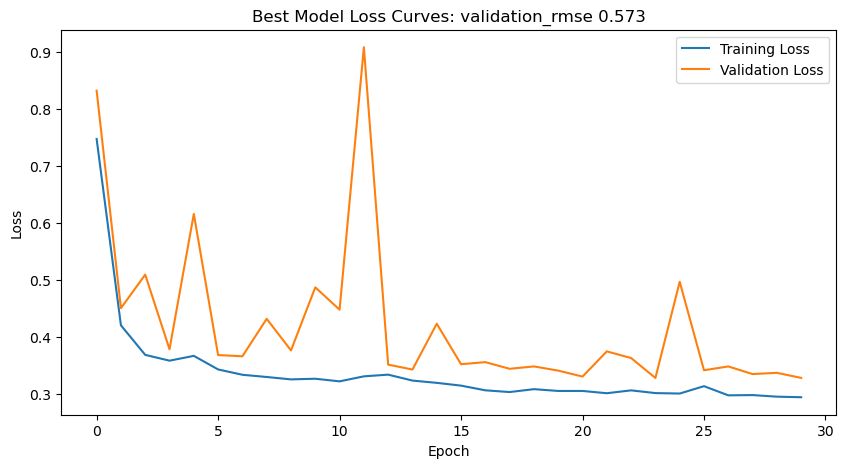

  hidden_neurons  learning_rate  train_loss  validation_loss  validation_rmse  \
3             50          0.010    0.294171         0.328087         0.572789   
4             50          0.005    0.294388         0.330629         0.575003   
7            100          0.005    0.292923         0.332453         0.576587   
8            100          0.001    0.303045         0.337844         0.581243   
5             50          0.001    0.311629         0.350863         0.592337   

   validation_r2  
3       0.762254  
4       0.760412  
7       0.759090  
8       0.755184  
5       0.745750  


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)  # Make y a 2D array for compatibility with torch

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

# Datasets and Dataloaders
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Hyperparameters
hidden_neurons = [20, 50, 100]
learning_rates = [0.01, 0.005, 0.001]
epochs = 30
results_df = pd.DataFrame(columns=['hidden_neurons', 'learning_rate', 'train_loss', 'validation_loss', 'validation_rmse', 'validation_r2'])

# Define training function
def train_model(model, optimizer, epochs=30):
    train_losses, val_losses, val_rmse, val_r2 = [], [], [], []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch).squeeze()
            loss = nn.MSELoss(reduction='mean')(output, y_batch.squeeze())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))

        model.eval()
        val_outputs = []
        val_targets = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                output = model(X_batch).squeeze()
                val_outputs.append(output)
                val_targets.append(y_batch.squeeze())
        val_outputs = torch.cat(val_outputs)
        val_targets = torch.cat(val_targets)
        mse = mean_squared_error(val_targets.numpy(), val_outputs.numpy())
        rmse = np.sqrt(mse)
        r2 = r2_score(val_targets.numpy(), val_outputs.numpy())
        val_losses.append(mse)
        val_rmse.append(rmse)
        val_r2.append(r2)

    return train_losses, val_losses, val_rmse, val_r2

# Selecting the best model based on a dynamic choice of metric
metrics_dict = {
    'validation_loss': float('inf'),
    'validation_rmse': float('inf'),
    'validation_r2': float('-inf')  # Higher is better
}
best_metric_name = 'validation_rmse'  # User can specify the metric here
best_metric_value = metrics_dict[best_metric_name]
best_model_info = {}

for n in hidden_neurons:
    for lr in learning_rates:
        model = nn.Sequential(
            nn.Linear(X_train.shape[1], n),
            nn.ReLU(),
            nn.Linear(n, 1)
        )
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_losses, val_losses, val_rmse, val_r2 = train_model(model, optimizer, epochs)

        # Log the results
        new_row = {
            'hidden_neurons': n,
            'learning_rate': lr,
            'train_loss': train_losses[-1],
            'validation_loss': val_losses[-1],
            'validation_rmse': val_rmse[-1],
            'validation_r2': val_r2[-1]
        }
        results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

        # Determine if the current model is the best based on the specified metric
        current_metric_value = {
            'validation_loss': val_losses[-1],
            'validation_rmse': val_rmse[-1],
            'validation_r2': val_r2[-1]
        }[best_metric_name]
        if ((best_metric_name in ['validation_loss', 'validation_rmse'] and current_metric_value < best_metric_value) or
            (best_metric_name == 'validation_r2' and current_metric_value > best_metric_value)):
            best_metric_value = current_metric_value
            best_model_info = {
                'model': model,
                'train_losses': train_losses,
                'val_losses': val_losses,
                'val_rmse': val_rmse,
                'val_r2': val_r2,
                'hidden_neurons': n,
                'learning_rate': lr
            }

# Plotting for the best model if it exists
if best_model_info:
    plt.figure(figsize=(10, 5))
    plt.plot(best_model_info['train_losses'], label='Training Loss')
    plt.plot(best_model_info['val_losses'], label='Validation Loss')
    plt.title(f'Best Model Loss Curves: {best_metric_name} {best_metric_value:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Sort results_df based on the selected metric, adjust ascending based on the metric's nature
ascending = True if best_metric_name in ['validation_loss', 'validation_rmse'] else False
sorted_results_df = results_df.sort_values(by=[best_metric_name], ascending=ascending)

# Print the sorted results
print(sorted_results_df.head())


## Week 10: Convolutional Neural Networks
<a id='Week10'></a>


### Concepts:

Convolutional Neural Networks (CNNs) use layers specifically designed for image data. These layers capture local relationships between nearby features in an image.

When we use a convolutional layer, we learn a set of smaller weight tensors, called filters (also known as kernels). We move each of these filters (i.e. convolve them) across the height and width of our input, to generate a new “image” of features. Each new “pixel” results from applying the filter to that location in the original image.

Color images pixels have 3 values/channels for rgb. Specifying the size of the filter takes Height, Width, Number of channels (i.e. thickness).

<img src='CNN.gif' align='center' width = 600>

- `Stride`: how much we move the filter by each time it’s applied. Default is 1 pixel. Larger stride decreases size of output.
- `Padding`: defines process once filter reaches end of row/column.
    - **Valid Padding**: Stop once pixel is hanging off image. e.g. 3x3 filter on 7x7 image has 5x5 output image since can’t process 6th pixel.
    - **Same Padding**: Surround the input image with zeros, so then can process all original pixels. For above example, output image is 7x7 i.e. same as input
    - **Reflection Padding**: Reflect the input tensor outwards
<img src='padding_schematic.svg' align = 'center' width=600>
    
    
- `Pooling`: Moving windows (same as filters), but instead of multiplying each image patch by a filter, we replace the patch with its maximum value (specifically in Max Pooling) i.e. just reduce the size of the patch and retain some local information, the most prominent feature. Also have stride and padding arguments.
<img src='pool_schematic_final.svg' align = 'center' width=1000>

### Pytorch Implementation

#### Conv2d Layers:

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

- `in_channels`: Number of input channels e.g. for colour image = 3
- `out_channels`: Number of filters applied
- `kernel_size`: e.g. 2x2 filters
- Explained stride and padding above

#### Pooling Layers
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)<br>
Same hyperparameters as above

### Example Model
```python
model = nn.Sequential(nn.Conv2d(3, 6, 5),
                      nn.ReLU(),
                      nn.MaxPool2d(2,2),
                      nn.Conv2d(6, 16, 5),
                      nn.ReLU(),
                      nn.MaxPool2d(2,2),
                      nn.Flatten(start_dim = 1),#flatten every dimension except for batch for linear layer
                      nn.Linear(16 * 5 * 5, 120),
                      nn.ReLU(),
                      nn.Linear(120, 84),
                      nn.ReLU(),
                      nn.Linear(84, 10))
```

# Useful Functions
<a id='Useful'></a>

## Classification

### Evaluating Metrics

In [129]:
def evaluate_classification_model(model, X, y):
    # Generate predictions using the model
    y_pred = model.predict(X)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

### Plot ROC Curve - Binary Classification

In [131]:

def plot_roc_curve(model, X_test, y_test, title='Receiver Operating Characteristic', figsize=(8, 6)):
    """
    Plot the ROC curve for a given non-tensor model and test dataset.

    Args:
    model (Model): The classifier, must have a method `predict_proba`.
    X_test (array-like): The test dataset inputs.
    y_test (array-like): The test dataset labels.
    title (str): The title of the plot.
    figsize (tuple): The size of the figure.
    """
    # Compute the scores using predict_proba
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Create the ROC plot
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


### Plot Decision Boundary - Two Feature Data

In [137]:
def plot_decision_boundary(model,X, y, ax, title='Decision Boundary',margin = 1):
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#D55E00','black','#56B4E9'])

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.contourf(x1,x2,y_pred,alpha = 0.2, cmap = custom_cmap,zorder = 0)
    ax.contour(x1,x2,y_pred,cmap = custom_cmap,zorder = 0, alpha = 0.5)
    ax.scatter(X_test[:,0][y_test==0],X_test[:,1][y_test==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1,edgecolor='black',lw = 0.5)
    ax.scatter(X_test[:,0][y_test==1],X_test[:,1][y_test==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1,edgecolor='black',lw = 0.5)
    ax.set_xlabel('$X_1$',fontsize = 16)
    ax.set_ylabel('$X_2$',fontsize = 16)
    ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
    ax.grid(color='xkcd:dark blue',alpha = 0.2)
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.legend(loc='upper right',fontsize = 12, framealpha = 1)
    ax.set_title(title,fontsize = 20)
    plt.show()


### Plot Confusion Matrix

In [166]:
def plot_confusion_matrix(classifier, X_train, y_train, X_test, y_test, class_labels):
    """
    Trains a classifier, predicts labels on the test set, computes the confusion matrix, and plots it using ConfusionMatrixDisplay.

    Parameters:
    - classifier: scikit-learn classifier object
    - X_train: Training feature dataset
    - y_train: Training label dataset
    - X_test: Test feature dataset
    - y_test: Test label dataset
    - class_labels: List of strings representing the class labels
    """
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = classifier.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create the confusion matrix plot
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.cividis, ax=ax, xticks_rotation='vertical')
    
    ax.set_title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


### Plot Correct/Incorrect Points - Two Feature Data

In [140]:
import matplotlib.pyplot as plt

def plot_classification_results(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 8))
    
    # Training data (less prominent)
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
                color='slategray', marker='o', label='Train Class 0', alpha=0.5)
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
                color='gray', marker='x', label='Train Class 1', alpha=0.5)
    
    # Correct predictions (stand out)
    plt.scatter(X_test[(y_test == y_pred) & (y_test == 0)][:, 0], X_test[(y_test == y_pred) & (y_test == 0)][:, 1], 
                color='darkgreen', marker='o', label='Correct Test Class 0', edgecolor='black')
    plt.scatter(X_test[(y_test == y_pred) & (y_test == 1)][:, 0], X_test[(y_test == y_pred) & (y_test == 1)][:, 1], 
                color='darkgreen', marker='x', label='Correct Test Class 1')
    
    # Incorrect predictions (stand out)
    plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], 
                color='red', marker='o', label='Incorrect Test Class 0', edgecolor='black')
    plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], 
                color='red', marker='x', label='Incorrect Test Class 1')

    plt.title('Training and Test Data Classification')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

## Regression

### Evaluate Metrics

In [157]:
def evaluate_regression_model(model, X, y):
    # Generate predictions using the model
    y_pred = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

## NN Classification

### Evaluate Model on Test Data

In [134]:
def evaluate_classification_model_t(model, X, y):
    model.eval()
    with torch.no_grad():
        y_pred = torch.round(model(X)).numpy()
    y_true = y.numpy()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


### Plot ROC Curve - Binary Classification

In [127]:
def plot_roc_curve_t(model, X_val, y_val, title='ROC Curve', figsize=(6, 4), dpi=150):
    """
    Plot the ROC curve for a given model and validation dataset.

    Args:
    model (torch.nn.Module): The neural network model.
    X_val (torch.Tensor): The validation dataset inputs.
    y_val (torch.Tensor): The validation dataset labels.
    title (str): The title of the plot.
    figsize (tuple): The size of the figure.
    dpi (int): The resolution of the figure.
    """
    # Compute predictions and ROC data
    y_pred_proba = model(X_val).detach().numpy()
    y_true = y_val.detach().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_score = roc_auc_score(y_true, y_pred_proba)

    # Create the ROC plot
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    ax.plot(fpr, tpr, color='#D55E00', label=f'ROC curve (area = {roc_score:.2f})')
    ax.set_xlabel('False positive rate', fontsize=20)
    ax.set_ylabel('True positive rate', fontsize=20)
    ax.set_title(title, fontsize=24)
    ax.xaxis.set_minor_locator(MultipleLocator(0.04))
    ax.yaxis.set_minor_locator(MultipleLocator(0.04))
    ax.tick_params(which='both', direction='in', top=True, right=True, labelsize=16)
    ax.grid(color='xkcd:dark blue', alpha=0.2)
    ax.legend()

    plt.show()

### Plot last epoch decision boundary - Two Feature Data

In [128]:
def plot_decision_boundary_t(model, X, y, epoch, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    preds = model(grid_tensor).reshape(xx.shape)
    ax.contourf(xx, yy, preds.detach().numpy(), alpha=0.5, cmap='RdBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k')
    ax.set_title(f"Epoch {epoch+1}")
    ax.set_xticks([])
    ax.set_yticks([])

## NN Regression

### Evaluate metrics

In [163]:

def evaluate_regression_model_t(model, X, y):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Deactivate autograd to reduce memory usage and speed up computations
        y_pred = model(X).flatten()  # Predict and flatten the output to match the target shape
    
    # Convert tensors to numpy arrays for using sklearn metrics
    y_pred_np = y_pred.numpy()
    y_true_np = y.numpy()
    
    # Calculate metrics
    mse = mean_squared_error(y_true_np, y_pred_np)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_np, y_pred_np)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

### All functions in one 

In [ ]:
def evaluate_classification_model(model, X, y):
    # Generate predictions using the model
    y_pred = model.predict(X)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

def plot_roc_curve(model, X_test, y_test, title='Receiver Operating Characteristic', figsize=(8, 6)):
    """
    Plot the ROC curve for a given non-tensor model and test dataset.

    Args:
    model (Model): The classifier, must have a method `predict_proba`.
    X_test (array-like): The test dataset inputs.
    y_test (array-like): The test dataset labels.
    title (str): The title of the plot.
    figsize (tuple): The size of the figure.
    """
    # Compute the scores using predict_proba
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Create the ROC plot
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_decision_boundary(model,X, y, ax, title='Decision Boundary',margin = 1):
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#D55E00','black','#56B4E9'])

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.contourf(x1,x2,y_pred,alpha = 0.2, cmap = custom_cmap,zorder = 0)
    ax.contour(x1,x2,y_pred,cmap = custom_cmap,zorder = 0, alpha = 0.5)
    ax.scatter(X_test[:,0][y_test==0],X_test[:,1][y_test==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1,edgecolor='black',lw = 0.5)
    ax.scatter(X_test[:,0][y_test==1],X_test[:,1][y_test==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1,edgecolor='black',lw = 0.5)
    ax.set_xlabel('$X_1$',fontsize = 16)
    ax.set_ylabel('$X_2$',fontsize = 16)
    ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
    ax.grid(color='xkcd:dark blue',alpha = 0.2)
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.legend(loc='upper right',fontsize = 12, framealpha = 1)
    ax.set_title(title,fontsize = 20)
    plt.show()

def plot_classification_results(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 8))
    
    # Training data (less prominent)
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
                color='slategray', marker='o', label='Train Class 0', alpha=0.5)
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
                color='gray', marker='x', label='Train Class 1', alpha=0.5)
    
    # Correct predictions (stand out)
    plt.scatter(X_test[(y_test == y_pred) & (y_test == 0)][:, 0], X_test[(y_test == y_pred) & (y_test == 0)][:, 1], 
                color='darkgreen', marker='o', label='Correct Test Class 0', edgecolor='black')
    plt.scatter(X_test[(y_test == y_pred) & (y_test == 1)][:, 0], X_test[(y_test == y_pred) & (y_test == 1)][:, 1], 
                color='darkgreen', marker='x', label='Correct Test Class 1')
    
    # Incorrect predictions (stand out)
    plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], 
                color='red', marker='o', label='Incorrect Test Class 0', edgecolor='black')
    plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], 
                color='red', marker='x', label='Incorrect Test Class 1')

    plt.title('Training and Test Data Classification')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def evaluate_classification_model_t(model, X, y):
    model.eval()
    with torch.no_grad():
        y_pred = torch.round(model(X)).numpy()
    y_true = y.numpy()
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

def plot_roc_curve_t(model, X_val, y_val, title='ROC Curve', figsize=(6, 4), dpi=150):
    """
    Plot the ROC curve for a given model and validation dataset.

    Args:
    model (torch.nn.Module): The neural network model.
    X_val (torch.Tensor): The validation dataset inputs.
    y_val (torch.Tensor): The validation dataset labels.
    title (str): The title of the plot.
    figsize (tuple): The size of the figure.
    dpi (int): The resolution of the figure.
    """
    # Compute predictions and ROC data
    y_pred_proba = model(X_val).detach().numpy()
    y_true = y_val.detach().numpy()
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_score = roc_auc_score(y_true, y_pred_proba)

    # Create the ROC plot
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    ax.plot(fpr, tpr, color='#D55E00', label=f'ROC curve (area = {roc_score:.2f})')
    ax.set_xlabel('False positive rate', fontsize=20)
    ax.set_ylabel('True positive rate', fontsize=20)
    ax.set_title(title, fontsize=24)
    ax.xaxis.set_minor_locator(MultipleLocator(0.04))
    ax.yaxis.set_minor_locator(MultipleLocator(0.04))
    ax.tick_params(which='both', direction='in', top=True, right=True, labelsize=16)
    ax.grid(color='xkcd:dark blue', alpha=0.2)
    ax.legend()

    plt.show()

def plot_decision_boundary_t(model, X, y, epoch, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    preds = model(grid_tensor).reshape(xx.shape)
    ax.contourf(xx, yy, preds.detach().numpy(), alpha=0.5, cmap='RdBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k')
    ax.set_title(f"Epoch {epoch+1}")
    ax.set_xticks([])
    ax.set_yticks([])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(classifier, X_train, y_train, X_test, y_test, class_labels):
    """
    Trains a classifier, predicts labels on the test set, computes the confusion matrix, and plots it using ConfusionMatrixDisplay.

    Parameters:
    - classifier: scikit-learn classifier object
    - X_train: Training feature dataset
    - y_train: Training label dataset
    - X_test: Test feature dataset
    - y_test: Test label dataset
    - class_labels: List of strings representing the class labels
    """
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = classifier.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create the confusion matrix plot
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.cividis, ax=ax, xticks_rotation='vertical')
    
    ax.set_title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()